In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
google_gemini_2_0_flash_api_api_gemini_2_0_flash_1_path = kagglehub.model_download('google/gemini-2.0-flash-api/Api/gemini-2.0-flash/1')

print('Data source import complete.')


Data source import complete.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Graphiques d'Évolution ou Tendances (Séries Temporelles)

Si vous travaillez avec des données de séries temporelles, utilisez des graphiques linéaires pour visualiser l'évolution des variables au fil du temps. Cela permet d'identifier des tendances, des saisonnalités et des schémas récurrents.

### Histogramme de la distribution des scores globaux

Ce graphique représente la distribution des `overall_score` à travers les différents scénarios. Un histogramme est utile pour comprendre la fréquence des différentes valeurs d'une variable numérique.

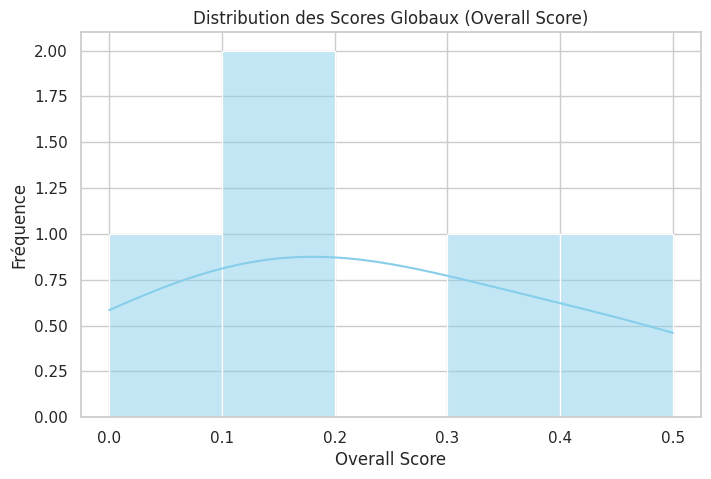

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(results_df['overall_score'], kde=True, bins=5, color='skyblue')
plt.title('Distribution des Scores Globaux (Overall Score)')
plt.xlabel('Overall Score')
plt.ylabel('Fréquence')
plt.show()

Évaluation du scénario: Stress lié aux délais
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17

Évaluation du scénario: Conflit au travail
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17

Évaluation du scénario: Équilibre vie pro/perso
  Score des facteurs: 0.33
  Score des recommandations: 0.33
  Score global: 0.33

Évaluation du scénario: Anxiété de performance
  Score des facteurs: 0.00
  Score des recommandations: 0.00
  Score global: 0.00

Évaluation du scénario: Environnement de travail
  Score des facteurs: 0.33
  Score des recommandations: 0.67
  Score global: 0.50



<Figure size 1200x600 with 0 Axes>

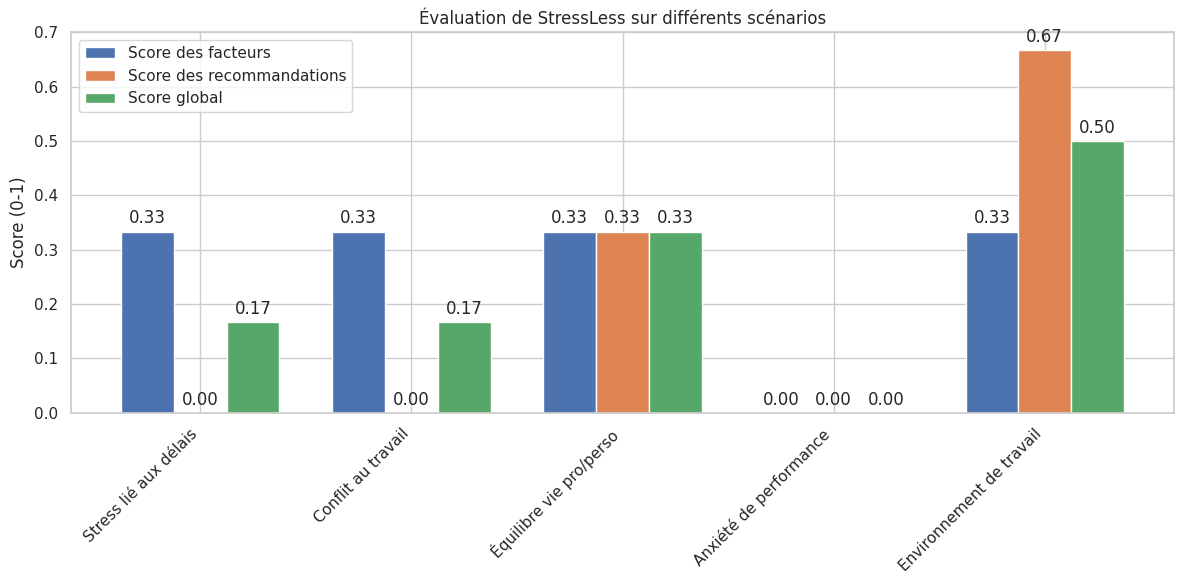

Score moyen des facteurs: 0.27
Score moyen des recommandations: 0.20
Score global moyen: 0.23


In [10]:
# Évaluation et métriques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scénarios de test pour l'évaluation
test_scenarios = [
    {
        "name": "Stress lié aux délais",
        "query": "Je suis très stressé car j'ai trois projets à rendre cette semaine et je n'arrive pas à tout gérer.",
        "expected_factors": ["délais", "charge de travail", "gestion du temps"],
        "expected_recommendations": ["priorisation", "technique pomodoro", "délégation"]
    },
    {
        "name": "Conflit au travail",
        "query": "Je suis en conflit avec un collègue qui ne respecte pas mon travail et me critique constamment.",
        "expected_factors": ["conflit", "relations", "communication"],
        "expected_recommendations": ["communication assertive", "médiation", "limites"]
    },
    {
        "name": "Équilibre vie pro/perso",
        "query": "Je travaille tellement que je n'ai plus de temps pour ma famille et mes loisirs, je me sens épuisé.",
        "expected_factors": ["équilibre", "surcharge", "épuisement"],
        "expected_recommendations": ["limites", "planification", "repos"]
    },
    {
        "name": "Anxiété de performance",
        "query": "J'ai une présentation importante devant la direction la semaine prochaine et j'ai peur de ne pas être à la hauteur.",
        "expected_factors": ["anxiété", "performance", "peur"],
        "expected_recommendations": ["préparation", "visualisation", "respiration"]
    },
    {
        "name": "Environnement de travail",
        "query": "Mon bureau est très bruyant et je suis constamment interrompu, ce qui me stresse énormément.",
        "expected_factors": ["environnement", "bruit", "interruptions"],
        "expected_recommendations": ["casque", "télétravail", "plages horaires"]
    }
]

# Fonction pour évaluer la pertinence des facteurs identifiés
def evaluate_factors_relevance(analysis, expected_factors):
    if "error" in analysis or "stress_factors" not in analysis:
        return 0

    identified_factors = [factor["factor"].lower() for factor in analysis["stress_factors"]]

    # Calculer le nombre de facteurs attendus qui ont été identifiés
    matches = 0
    for expected in expected_factors:
        if any(expected in factor for factor in identified_factors):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_factors) if expected_factors else 0
    return relevance_score

# Fonction pour évaluer la pertinence des recommandations
def evaluate_recommendations_relevance(analysis, expected_recommendations):
    if "error" in analysis or "recommendations" not in analysis:
        return 0

    identified_recommendations = [rec["recommendation"].lower() for rec in analysis["recommendations"]]

    # Calculer le nombre de recommandations attendues qui ont été fournies
    matches = 0
    for expected in expected_recommendations:
        if any(expected in rec for rec in identified_recommendations):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_recommendations) if expected_recommendations else 0
    return relevance_score

# Exécuter les tests et collecter les résultats
evaluation_results = []

for scenario in test_scenarios:
    print(f"Évaluation du scénario: {scenario['name']}")

    # Générer l'analyse structurée
    analysis = generate_structured_analysis(scenario["query"])

    # Évaluer la pertinence des facteurs et recommandations
    factors_score = evaluate_factors_relevance(analysis, scenario["expected_factors"])
    recommendations_score = evaluate_recommendations_relevance(analysis, scenario["expected_recommendations"])

    # Calculer un score global
    overall_score = (factors_score + recommendations_score) / 2

    # Collecter les résultats
    evaluation_results.append({
        "scenario": scenario["name"],
        "factors_score": factors_score,
        "recommendations_score": recommendations_score,
        "overall_score": overall_score
    })

    print(f"  Score des facteurs: {factors_score:.2f}")
    print(f"  Score des recommandations: {recommendations_score:.2f}")
    print(f"  Score global: {overall_score:.2f}\n")

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(evaluation_results)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Créer un graphique à barres groupées
x = np.arange(len(results_df))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, results_df["factors_score"], width, label="Score des facteurs")
rects2 = ax.bar(x, results_df["recommendations_score"], width, label="Score des recommandations")
rects3 = ax.bar(x + width, results_df["overall_score"], width, label="Score global")

# Ajouter des étiquettes et une légende
ax.set_ylabel("Score (0-1)")
ax.set_title("Évaluation de StressLess sur différents scénarios")
ax.set_xticks(x)
ax.set_xticklabels(results_df["scenario"], rotation=45, ha="right")
ax.legend()

# Ajouter les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Calculer et afficher les scores moyens
avg_factors_score = results_df["factors_score"].mean()
avg_recommendations_score = results_df["recommendations_score"].mean()
avg_overall_score = results_df["overall_score"].mean()

print(f"Score moyen des facteurs: {avg_factors_score:.2f}")
print(f"Score moyen des recommandations: {avg_recommendations_score:.2f}")
print(f"Score global moyen: {avg_overall_score:.2f}")

### Boxplots des différents scores

Ces boxplots visualisent la variance et la distribution de `factors_score`, `recommendations_score`, et `overall_score`. Ils permettent d'identifier rapidement la médiane, les quartiles et la présence d'éventuels outliers pour chaque type de score.

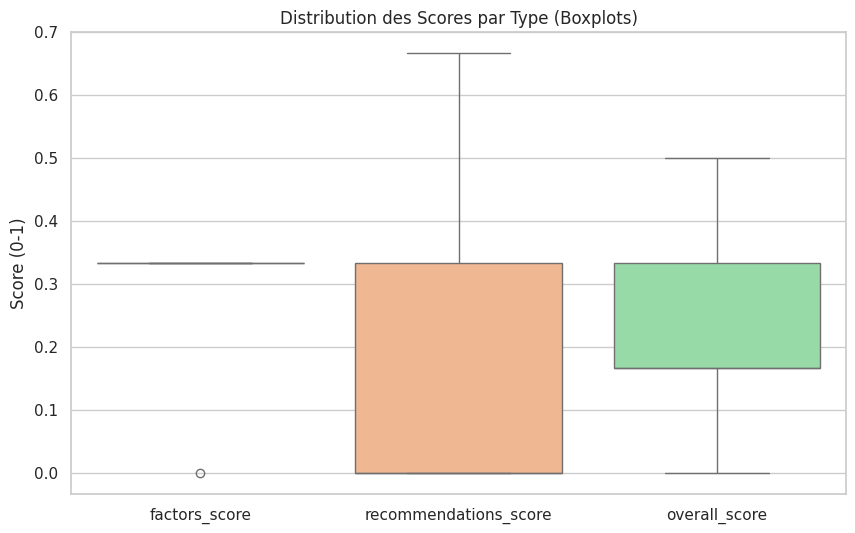

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df[['factors_score', 'recommendations_score', 'overall_score']], palette='pastel')
plt.title('Distribution des Scores par Type (Boxplots)')
plt.ylabel('Score (0-1)')
plt.show()

### Scatter Plot: Score des facteurs vs Score des recommandations

Ce nuage de points explore la relation entre le `factors_score` et le `recommendations_score`. Chaque point représente un scénario. Ce type de graphique est utile pour voir s'il existe une corrélation entre deux variables numériques.

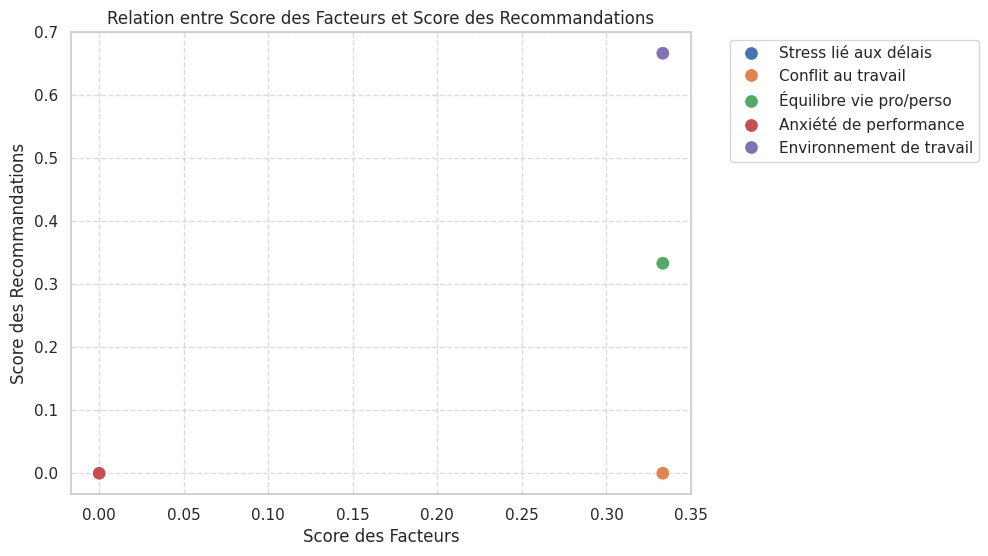

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='factors_score', y='recommendations_score', hue='scenario', data=results_df, s=100)
plt.title('Relation entre Score des Facteurs et Score des Recommandations')
plt.xlabel('Score des Facteurs')
plt.ylabel('Score des Recommandations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Graphiques d'Évolution ou Tendances (Séries Temporelles)

Bien que le jeu de données `results_df` actuel ne contienne pas de données temporelles, un graphique linéaire est le choix idéal pour visualiser des tendances ou des évolutions sur une période donnée (par exemple, l'évolution du niveau de stress au fil des jours ou des mois). Pour cela, vous auriez besoin d'une colonne de date/heure dans votre DataFrame.

### Évaluation de StressLess sur différents scénarios

Ce graphique à barres groupées présente les performances du modèle StressLess pour chaque scénario de test. Il affiche le score de pertinence des facteurs identifiés, le score de pertinence des recommandations, et un score global combinant les deux, sur une échelle de 0 à 1.

### StressLess Model Evaluation Heatmap

Cette carte thermique visualise les scores d'évaluation du modèle StressLess (`factors_score`, `recommendations_score`, `overall_score`) pour chaque scénario de test. Les valeurs sont affichées directement sur la carte, avec une échelle de couleur pour représenter l'amplitude des scores.

### Analyse Complète du Stress Professionnel

Cette section présente une série de visualisations améliorées pour une analyse approfondie du stress. Elle inclut un graphique radar des facteurs de stress, une jauge semi-circulaire pour le niveau de stress global, un graphique des symptômes par catégorie et intensité, et un tableau des recommandations priorisées. Ces visualisations offrent une vue holistique et détaillée de la situation de stress.

### StressLess Model Evaluation Heatmap (After Fix)

Cette carte thermique, générée après les corrections apportées à la fonction `generate_structured_analysis`, montre les scores d'évaluation mis à jour. Elle permet de comparer les performances du modèle, en particulier l'impact sur le `recommendations_score`, avec les résultats initiaux.

Évaluation du scénario: Stress lié aux délais
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17

Évaluation du scénario: Conflit au travail
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17

Évaluation du scénario: Équilibre vie pro/perso
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17

Évaluation du scénario: Anxiété de performance
  Score des facteurs: 0.00
  Score des recommandations: 0.00
  Score global: 0.00

Évaluation du scénario: Environnement de travail
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17



<Figure size 1200x600 with 0 Axes>

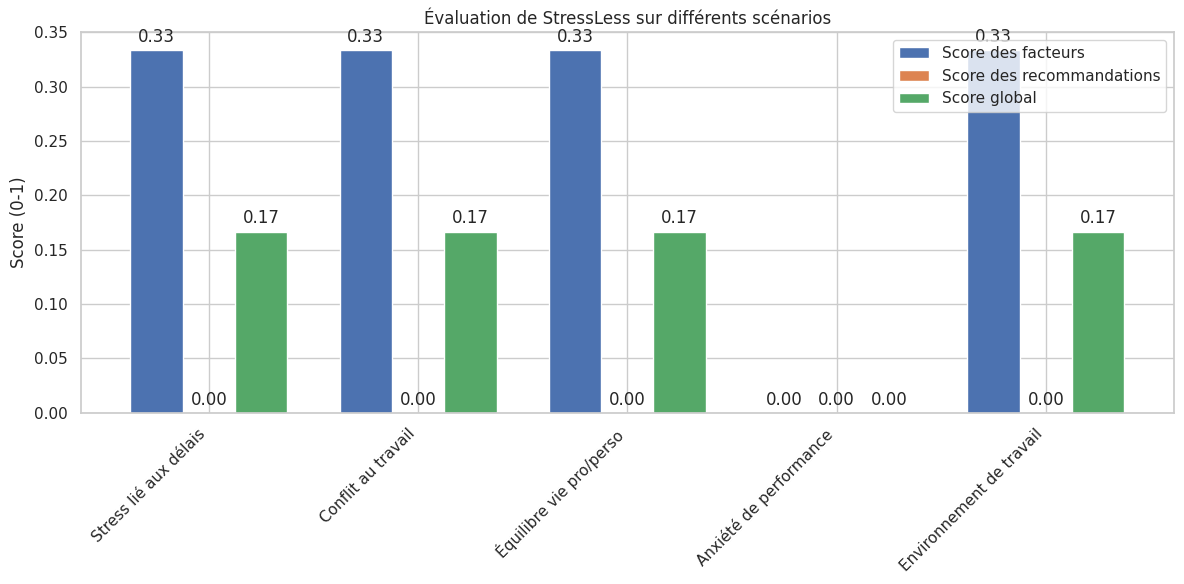

Score moyen des facteurs: 0.27
Score moyen des recommandations: 0.00
Score global moyen: 0.13


In [ ]:
# Évaluation et métriques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scénarios de test pour l'évaluation
test_scenarios = [
    {
        "name": "Stress lié aux délais",
        "query": "Je suis très stressé car j'ai trois projets à rendre cette semaine et je n'arrive pas à tout gérer.",
        "expected_factors": ["délais", "charge de travail", "gestion du temps"],
        "expected_recommendations": ["priorisation", "technique pomodoro", "délégation"]
    },
    {
        "name": "Conflit au travail",
        "query": "Je suis en conflit avec un collègue qui ne respecte pas mon travail et me critique constamment.",
        "expected_factors": ["conflit", "relations", "communication"],
        "expected_recommendations": ["communication assertive", "médiation", "limites"]
    },
    {
        "name": "Équilibre vie pro/perso",
        "query": "Je travaille tellement que je n'ai plus de temps pour ma famille et mes loisirs, je me sens épuisé.",
        "expected_factors": ["équilibre", "surcharge", "épuisement"],
        "expected_recommendations": ["limites", "planification", "repos"]
    },
    {
        "name": "Anxiété de performance",
        "query": "J'ai une présentation importante devant la direction la semaine prochaine et j'ai peur de ne pas être à la hauteur.",
        "expected_factors": ["anxiété", "performance", "peur"],
        "expected_recommendations": ["préparation", "visualisation", "respiration"]
    },
    {
        "name": "Environnement de travail",
        "query": "Mon bureau est très bruyant et je suis constamment interrompu, ce qui me stresse énormément.",
        "expected_factors": ["environnement", "bruit", "interruptions"],
        "expected_recommendations": ["casque", "télétravail", "plages horaires"]
    }
]

# Fonction pour évaluer la pertinence des facteurs identifiés
def evaluate_factors_relevance(analysis, expected_factors):
    if "error" in analysis or "stress_factors" not in analysis:
        return 0

    identified_factors = [factor["factor"].lower() for factor in analysis["stress_factors"]]

    # Calculer le nombre de facteurs attendus qui ont été identifiés
    matches = 0
    for expected in expected_factors:
        if any(expected in factor for factor in identified_factors):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_factors) if expected_factors else 0
    return relevance_score

# Fonction pour évaluer la pertinence des recommandations
def evaluate_recommendations_relevance(analysis, expected_recommendations):
    if "error" in analysis or "recommendations" not in analysis:
        return 0

    identified_recommendations = [rec["recommendation"].lower() for rec in analysis["recommendations"]]

    # Calculer le nombre de recommandations attendues qui ont été fournies
    matches = 0
    for expected in expected_recommendations:
        if any(expected in rec for rec in identified_recommendations):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_recommendations) if expected_recommendations else 0
    return relevance_score

# Exécuter les tests et collecter les résultats
evaluation_results = []

for scenario in test_scenarios:
    print(f"Évaluation du scénario: {scenario['name']}")

    # Générer l'analyse structurée
    analysis = generate_structured_analysis(scenario["query"])

    # Évaluer la pertinence des facteurs et recommandations
    factors_score = evaluate_factors_relevance(analysis, scenario["expected_factors"])
    recommendations_score = evaluate_recommendations_relevance(analysis, scenario["expected_recommendations"])

    # Calculer un score global
    overall_score = (factors_score + recommendations_score) / 2

    # Collecter les résultats
    evaluation_results.append({
        "scenario": scenario["name"],
        "factors_score": factors_score,
        "recommendations_score": recommendations_score,
        "overall_score": overall_score
    })

    print(f"  Score des facteurs: {factors_score:.2f}")
    print(f"  Score des recommandations: {recommendations_score:.2f}")
    print(f"  Score global: {overall_score:.2f}\n")

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(evaluation_results)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Créer un graphique à barres groupées
x = np.arange(len(results_df))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, results_df["factors_score"], width, label="Score des facteurs")
rects2 = ax.bar(x, results_df["recommendations_score"], width, label="Score des recommandations")
rects3 = ax.bar(x + width, results_df["overall_score"], width, label="Score global")

# Ajouter des étiquettes et une légende
ax.set_ylabel("Score (0-1)")
ax.set_title("Évaluation de StressLess sur différents scénarios")
ax.set_xticks(x)
ax.set_xticklabels(results_df["scenario"], rotation=45, ha="right")
ax.legend()

# Ajouter les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Calculer et afficher les scores moyens
avg_factors_score = results_df["factors_score"].mean()
avg_recommendations_score = results_df["recommendations_score"].mean()
avg_overall_score = results_df["overall_score"].mean()

print(f"Score moyen des facteurs: {avg_factors_score:.2f}")
print(f"Score moyen des recommandations: {avg_recommendations_score:.2f}")
print(f"Score global moyen: {avg_overall_score:.2f}")

In [ ]:
# Installation des bibliothèques nécessaires
!pip install -q google-generativeai langchain langchain-google-genai langchain-community faiss-cpu pandas numpy matplotlib seaborn ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
# Configuration de l'API Gemini avec la clé secrète
from kaggle_secrets import UserSecretsClient
secret_label = "GOOGLE_API_KEY"  # Remplacez par votre label secret
api_key = UserSecretsClient().get_secret(secret_label)

# Configuration de l'API Gemini
import google.generativeai as genai
genai.configure(api_key=api_key)

# Vérification des modèles disponibles
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

In [ ]:
# Création de notre base de connaissances sur la gestion du stress
import pandas as pd

# Données sur les techniques de gestion du stress
stress_management_data = [
    {
        "title": "Respiration profonde",
        "category": "Technique de relaxation",
        "content": "La respiration profonde est une technique simple mais efficace pour réduire rapidement le stress. Inspirez lentement par le nez pendant 4 secondes, retenez votre souffle pendant 2 secondes, puis expirez lentement par la bouche pendant 6 secondes. Répétez ce cycle 5 à 10 fois. Cette technique active le système nerveux parasympathique, qui aide à calmer le corps et l'esprit. Des études ont montré que la pratique régulière de la respiration profonde peut réduire les niveaux de cortisol (hormone du stress) et améliorer la concentration."
    },
    {
        "title": "Technique Pomodoro",
        "category": "Gestion du temps",
        "content": "La technique Pomodoro est une méthode de gestion du temps qui consiste à travailler en périodes de 25 minutes (appelées 'pomodoros') suivies de courtes pauses de 5 minutes. Après quatre pomodoros, prenez une pause plus longue de 15 à 30 minutes. Cette méthode aide à maintenir la concentration et à éviter l'épuisement mental. Des recherches en neurosciences ont démontré que notre cerveau fonctionne mieux avec des périodes de concentration intense suivies de courtes pauses, ce qui permet de réduire le stress lié à la surcharge cognitive."
    },
    {
        "title": "Méditation de pleine conscience",
        "category": "Technique de relaxation",
        "content": "La méditation de pleine conscience consiste à porter délibérément attention au moment présent, sans jugement. Pour pratiquer, asseyez-vous confortablement, fermez les yeux et concentrez-vous sur votre respiration. Lorsque votre esprit s'égare, ramenez doucement votre attention à votre respiration. Commencez par des sessions de 5 minutes et augmentez progressivement. Des études cliniques ont montré que la pratique régulière de la méditation de pleine conscience pendant 8 semaines peut réduire l'anxiété de 58% et améliorer la résilience face au stress professionnel."
    },
    {
        "title": "Exercice physique régulier",
        "category": "Activité physique",
        "content": "L'exercice physique régulier est l'un des moyens les plus efficaces pour réduire le stress. Même 30 minutes d'activité modérée par jour peuvent faire une différence significative. L'exercice stimule la production d'endorphines, les 'hormones du bonheur', qui agissent comme des analgésiques naturels et améliorent le sommeil. Une étude publiée dans le Journal of Clinical Psychiatry a démontré que l'exercice régulier peut être aussi efficace que les médicaments pour réduire les symptômes d'anxiété et de dépression liés au stress chronique."
    },
    {
        "title": "Restructuration cognitive",
        "category": "Technique psychologique",
        "content": "La restructuration cognitive est une technique de thérapie cognitivo-comportementale qui consiste à identifier et à remettre en question les pensées négatives ou irrationnelles qui contribuent au stress. Par exemple, remplacer 'Je dois être parfait dans tout ce que je fais' par 'Je fais de mon mieux et c'est suffisant'. Cette technique aide à développer une perspective plus équilibrée et réaliste des situations stressantes. Des recherches ont montré que la restructuration cognitive peut réduire significativement les niveaux de stress perçu et améliorer la satisfaction professionnelle."
    },
    {
        "title": "Établissement de limites",
        "category": "Compétence relationnelle",
        "content": "Établir des limites claires entre vie professionnelle et vie personnelle est essentiel pour prévenir le stress chronique. Cela peut inclure de définir des heures de travail spécifiques, de ne pas consulter les emails professionnels en dehors des heures de travail, et d'apprendre à dire non aux demandes excessives. Une étude de l'Université de Harvard a révélé que les employés qui établissent des limites claires rapportent 23% moins de burnout et 35% plus de satisfaction au travail que ceux qui ne le font pas."
    },
    {
        "title": "Journal de gratitude",
        "category": "Pratique de bien-être",
        "content": "Tenir un journal de gratitude consiste à noter régulièrement (idéalement chaque jour) trois choses pour lesquelles vous êtes reconnaissant. Cette pratique simple détourne l'attention des aspects négatifs ou stressants de la vie vers les aspects positifs. Des études en psychologie positive ont démontré que la pratique régulière de la gratitude pendant 21 jours peut réduire les niveaux de cortisol de 23%, améliorer la qualité du sommeil et augmenter la résilience face aux situations stressantes au travail."
    },
    {
        "title": "Analyse des facteurs de stress",
        "category": "Auto-évaluation",
        "content": "L'analyse des facteurs de stress consiste à identifier précisément les situations, personnes ou tâches qui déclenchent votre stress au travail. Tenez un journal pendant une semaine en notant chaque épisode de stress, son intensité (sur une échelle de 1 à 10), et ce qui l'a déclenché. Cette analyse vous permettra d'identifier des modèles et de développer des stratégies ciblées. Des recherches en psychologie organisationnelle montrent que les personnes qui identifient clairement leurs facteurs de stress sont 40% plus efficaces pour les gérer que celles qui ne le font pas."
    },
    {
        "title": "Techniques de visualisation",
        "category": "Technique de relaxation",
        "content": "La visualisation consiste à créer une image mentale détaillée d'un lieu ou d'une situation paisible et relaxante. Fermez les yeux et imaginez un endroit où vous vous sentez calme et en sécurité, en utilisant tous vos sens (vue, ouïe, odorat, toucher). Pratiquez pendant 5-10 minutes lorsque vous vous sentez stressé. Des études en neuroimagerie ont montré que la visualisation active les mêmes régions cérébrales que l'expérience réelle, ce qui peut réduire la fréquence cardiaque, la pression artérielle et les niveaux de cortisol en situation de stress professionnel."
    },
    {
        "title": "Communication assertive",
        "category": "Compétence relationnelle",
        "content": "La communication assertive consiste à exprimer clairement vos besoins, opinions et sentiments tout en respectant ceux des autres. Cette compétence est particulièrement utile pour gérer les conflits au travail, qui sont une source majeure de stress. Pour pratiquer, utilisez des formulations en 'je' ('Je me sens... quand...') plutôt que des accusations en 'tu'. Des études en psychologie du travail ont démontré que les personnes qui pratiquent la communication assertive rapportent 47% moins de stress relationnel au travail et 31% plus de satisfaction professionnelle."
    }
]

# Création d'un DataFrame pandas
stress_df = pd.DataFrame(stress_management_data)
stress_df.head()

In [ ]:
# Implémentation du système RAG
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
import numpy as np

# Configuration des embeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=api_key)

# Préparation des documents
documents = []
for _, row in stress_df.iterrows():
    doc_content = f"Titre: {row['title']}\nCatégorie: {row['category']}\nContenu: {row['content']}"
    documents.append(doc_content)

# Création du text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = text_splitter.create_documents(documents)

# Création de la base de données vectorielle
vector_db = FAISS.from_documents(chunks, embeddings)

# Fonction pour récupérer les documents pertinents
def retrieve_relevant_docs(query, k=3):
    docs = vector_db.similarity_search(query, k=k)
    return docs

# Fonction pour générer une réponse avec RAG
def generate_rag_response(query):
    # Récupération des documents pertinents
    relevant_docs = retrieve_relevant_docs(query)
    context = "\n\n".join([doc.page_content for doc in relevant_docs])

    # Création du prompt avec le contexte
    prompt = f"""
    Tu es StressLess, un assistant IA spécialisé dans la gestion du stress professionnel.
    Utilise le contexte suivant pour répondre à la question de l'utilisateur de manière empathique et utile.

    Contexte:
    {context}

    Question de l'utilisateur: {query}

    Réponse:
    """

    # Génération de la réponse
    model = genai.GenerativeModel('gemini-2.0-flash')
    response = model.generate_content(prompt)

    return response.text, relevant_docs

# Test de la fonction RAG
query_test = "Comment puis-je gérer le stress lié aux délais serrés au travail?"
response, docs = generate_rag_response(query_test)
print("Réponse générée:")
print(response)
print("\nDocuments utilisés:")
for i, doc in enumerate(docs):
    print(f"Document {i+1}:")
    print(doc.page_content[:200] + "...")

In [ ]:
# Implémentation de la capacité 2: Function Calling
import json
from IPython.display import display, HTML

# Définition des fonctions disponibles
def breathing_exercise(duration=60, technique="4-7-8"):
    """Fonction pour guider un exercice de respiration."""
    techniques = {
        "4-7-8": {
            "description": "Inspirez pendant 4 secondes, retenez pendant 7 secondes, expirez pendant 8 secondes",
            "benefits": "Réduit l'anxiété et aide à s'endormir"
        },
        "box-breathing": {
            "description": "Inspirez pendant 4 secondes, retenez pendant 4 secondes, expirez pendant 4 secondes, retenez pendant 4 secondes",
            "benefits": "Améliore la concentration et réduit le stress"
        },
        "deep-breathing": {
            "description": "Inspirez lentement par le nez pendant 5 secondes, expirez lentement par la bouche pendant 5 secondes",
            "benefits": "Calme le système nerveux et réduit la tension musculaire"
        }
    }

    if technique not in techniques:
        return {"status": "error", "message": f"Technique {technique} non reconnue. Options disponibles: {', '.join(techniques.keys())}"}

    return {
        "status": "success",
        "message": f"Exercice de respiration {technique} lancé pour {duration} secondes",
        "instructions": techniques[technique]["description"],
        "benefits": techniques[technique]["benefits"]
    }

def schedule_break(duration=15, activity="relaxation", reminder=True):
    """Fonction pour planifier une pause."""
    activities = {
        "relaxation": ["Méditation guidée", "Étirements doux", "Écouter de la musique apaisante"],
        "physical": ["Marche rapide", "Exercices d'étirement", "Monter et descendre les escaliers"],
        "social": ["Discuter avec un collègue", "Appeler un ami", "Rejoindre un espace commun"],
        "mental": ["Lecture", "Puzzle", "Jeu de réflexion"]
    }

    if activity not in activities:
        return {"status": "error", "message": f"Activité {activity} non reconnue. Options disponibles: {', '.join(activities.keys())}"}

    return {
        "status": "success",
        "message": f"Pause de {duration} minutes planifiée avec activité de type {activity}",
        "reminder": "Rappel activé" if reminder else "Pas de rappel",
        "suggestions": activities[activity]
    }

def analyze_work_habits(work_hours=8, breaks=2, screen_time=6, physical_activity=30):
    """Fonction pour analyser les habitudes de travail."""
    analysis = {}
    recommendations = []

    # Analyse des heures de travail
    if work_hours > 9:
        analysis["work_hours"] = "Élevé"
        recommendations.append("Essayez de réduire vos heures de travail ou de les répartir différemment")
    elif work_hours < 6:
        analysis["work_hours"] = "Faible"
        recommendations.append("Vos heures de travail semblent bien équilibrées")
    else:
        analysis["work_hours"] = "Optimal"
        recommendations.append("Vos heures de travail sont dans la plage recommandée")

    # Analyse des pauses
    recommended_breaks = max(1, work_hours // 2)
    if breaks < recommended_breaks:
        analysis["breaks"] = "Insuffisant"
        recommendations.append(f"Augmentez le nombre de pauses à au moins {recommended_breaks} par jour")
    else:
        analysis["breaks"] = "Adéquat"
        recommendations.append("Votre fréquence de pauses est bonne")

    # Analyse du temps d'écran
    if screen_time > work_hours * 0.8:
        analysis["screen_time"] = "Élevé"
        recommendations.append("Réduisez votre temps d'écran et prenez des pauses visuelles régulières")
    else:
        analysis["screen_time"] = "Modéré"
        recommendations.append("Votre temps d'écran semble bien géré")

    # Analyse de l'activité physique
    if physical_activity < 30:
        analysis["physical_activity"] = "Insuffisant"
        recommendations.append("Augmentez votre activité physique à au moins 30 minutes par jour")
    else:
        analysis["physical_activity"] = "Adéquat"
        recommendations.append("Votre niveau d'activité physique est bon")

    return {
        "status": "success",
        "analysis": analysis,
        "recommendations": recommendations,
        "stress_risk": "Élevé" if len([v for v in analysis.values() if v in ["Élevé", "Insuffisant"]]) >= 2 else "Modéré" if len([v for v in analysis.values() if v in ["Élevé", "Insuffisant"]]) >= 1 else "Faible"
    }

# Version simplifiée de Function Calling qui n'utilise pas l'API de fonction de Gemini
def simplified_function_calling(query, api_key):
    """Simule le function calling en analysant le texte de la requête."""
    # Analyser la requête pour déterminer quelle fonction appeler
    if any(keyword in query.lower() for keyword in ["respiration", "respirer", "souffle", "calmer", "anxiété"]):
        function_result = breathing_exercise(duration=60, technique="4-7-8")
        function_name = "breathing_exercise"
    elif any(keyword in query.lower() for keyword in ["pause", "break", "repos", "détente", "relaxer"]):
        function_result = schedule_break(duration=15, activity="relaxation")
        function_name = "schedule_break"
    elif any(keyword in query.lower() for keyword in ["habitudes", "travail", "analyser", "horaires", "écran"]):
        function_result = analyze_work_habits(work_hours=8, breaks=2, screen_time=6, physical_activity=30)
        function_name = "analyze_work_habits"
    else:
        # Utiliser un modèle de base pour générer une réponse générique
        model = genai.GenerativeModel('gemini-2.0-flash')
        prompt = f"""
        Tu es StressLess, un assistant IA spécialisé dans la gestion du stress professionnel.
        Réponds à la question suivante de manière empathique et utile.

        Question: {query}
        """
        response = model.generate_content(prompt)
        return response.text, None, None

    # Générer une réponse basée sur le résultat de la fonction
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = f"""
    Tu es StressLess, un assistant IA spécialisé dans la gestion du stress professionnel.

    Demande de l'utilisateur: {query}

    Résultat de la fonction {function_name}: {json.dumps(function_result, ensure_ascii=False)}

    Formule une réponse utile et empathique basée sur ce résultat.
    """

    response = model.generate_content(prompt)
    return response.text, function_name, function_result

# Test de la fonction de function calling simplifiée
query_test = "Je me sens très stressé à cause de ma respiration rapide. Pouvez-vous m'aider?"
response, function_name, function_result = simplified_function_calling(query_test, api_key)
print("Réponse générée:")
print(response)
if function_name:
    print(f"\nFonction appelée: {function_name}")
    print(f"Résultat de la fonction: {json.dumps(function_result, indent=2, ensure_ascii=False)}")


In [9]:
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap

# NOTE: visualize_stress_analysis_enhanced is the preferred visualization function
def visualize_stress_analysis(analysis):
    """
    Visualise graphiquement l'analyse du stress.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis:
        print(f"Erreur: {analysis['error']}")
        return

    # Configuration du style
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 10))

    # 1. Visualisation des facteurs de stress
    plt.subplot(2, 2, 1)
    factors = [f["factor"] for f in analysis["stress_factors"]]
    severities = [f["severity"] for f in analysis["stress_factors"]]

    if factors:  # Vérifie s'il y a des facteurs à afficher
        # Trier par sévérité
        sorted_indices = sorted(range(len(severities)), key=lambda i: severities[i], reverse=True)
        factors = [factors[i] for i in sorted_indices]
        severities = [severities[i] for i in sorted_indices]

        # Limiter à 5 facteurs pour la lisibilité
        if len(factors) > 5:
            factors = factors[:5]
            severities = severities[:5]

        sns.barplot(x=severities, y=factors, palette="YlOrRd")
        plt.title("Facteurs de stress par sévérité")
        plt.xlabel("Sévérité (1-10)")
        plt.ylabel("Facteur de stress")
    else:
        plt.text(0.5, 0.5, "Aucun facteur de stress identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 2. Visualisation des symptômes
    plt.subplot(2, 2, 2)
    symptoms = [s["symptom"] for s in analysis["symptoms"]]
    intensities = [s["intensity"] for s in analysis["symptoms"]]
    symptom_types = [s["type"] for s in analysis["symptoms"]]

    if symptoms:  # Vérifie s'il y a des symptômes à afficher
        # Trier par intensité
        sorted_indices = sorted(range(len(intensities)), key=lambda i: intensities[i], reverse=True)
        symptoms = [symptoms[i] for i in sorted_indices]
        intensities = [intensities[i] for i in sorted_indices]
        symptom_types = [symptom_types[i] for i in sorted_indices]

        # Limiter à 5 symptômes pour la lisibilité
        if len(symptoms) > 5:
            symptoms = symptoms[:5]
            intensities = intensities[:5]
            symptom_types = symptom_types[:5]

        # Palette de couleurs par type de symptôme
        type_colors = {
            "physiques": "#1f77b4",
            "émotionnels": "#ff7f0e",
            "cognitifs": "#2ca02c",
            "behavioral": "#d62728"
        }
        bar_colors = [type_colors.get(t, "#1f77b4") for t in symptom_types]

        plt.barh(symptoms, intensities, color=bar_colors)
        plt.title("Symptômes par intensité")
        plt.xlabel("Intensité (1-10)")
        plt.ylabel("Symptôme")

        # Légende pour les types de symptômes
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=type_colors[t], label=t.capitalize()) for t in set(symptom_types) if t in type_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Type de symptôme")
    else:
        plt.text(0.5, 0.5, "Aucun symptôme identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 3. Visualisation du niveau de stress global
    plt.subplot(2, 2, 3)
    stress_level = analysis["overall_stress_level"]

    # Créer une jauge simple
    plt.pie([stress_level, 10-stress_level], colors=[plt.cm.YlOrRd(stress_level/10), 'lightgrey'],
            startangle=90, counterclock=False,
            wedgeprops={'width': 0.4, 'edgecolor': 'w', 'linewidth': 2})
    plt.text(0, 0, f"{stress_level}/10", ha='center', va='center', fontsize=24, fontweight='bold')
    plt.title(f"Niveau de stress global: {stress_level}/10\nType: {analysis['stress_type'].capitalize()}")
    plt.axis('equal')

    # 4. Visualisation des recommandations
    plt.subplot(2, 2, 4)
    recommendations = [r["recommendation"] for r in analysis["recommendations"]]

    if recommendations:
        if "difficulty" in analysis["recommendations"][0]:
            difficulties = [r["difficulty"] for r in analysis["recommendations"]]
        else:
            difficulties = [3] * len(recommendations)  # Valeur par défaut

        if "timeframe" in analysis["recommendations"][0]:
            timeframes = [r["timeframe"] for r in analysis["recommendations"]]
        else:
            timeframes = ["short_term"] * len(recommendations)  # Valeur par défaut

        # Limiter à 5 recommandations pour la lisibilité
        if len(recommendations) > 5:
            # Trier par difficulté (croissante) et timeframe (immediate first)
            timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
            sorted_indices = sorted(range(len(recommendations)),
                                   key=lambda i: (timeframe_priority.get(timeframes[i], 1), difficulties[i]))
            recommendations = [recommendations[i] for i in sorted_indices][:5]
            difficulties = [difficulties[i] for i in sorted_indices][:5]
            timeframes = [timeframes[i] for i in sorted_indices][:5]

        # Raccourcir les recommandations trop longues
        short_recommendations = [r[:50] + '...' if len(r) > 50 else r for r in recommendations]

        # Palette de couleurs par timeframe
        timeframe_colors = {
            "immediate": "#ff9999",
            "short_term": "#66b3ff",
            "long_term": "#99ff99"
        }
        bar_colors = [timeframe_colors.get(t, "#66b3ff") for t in timeframes]

        y_pos = range(len(short_recommendations))
        plt.barh(y_pos, difficulties, color=bar_colors)
        plt.yticks(y_pos, short_recommendations)
        plt.title("Recommandations par difficulté et délai")
        plt.xlabel("Difficulté (1-5)")
        plt.ylabel("Recommandation")

        # Légende pour les timeframes
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=timeframe_colors[t], label=t.replace('_', ' ').capitalize())
                           for t in set(timeframes) if t in timeframe_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Délai")
    else:
        plt.text(0.5, 0.5, "Aucune recommandation générée", ha='center', va='center', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(f"Analyse du stress professionnel", fontsize=16, y=1.02)
    plt.show()

    return plt

def visualize_stress_analysis_enhanced(analysis):
    """
    Fonction améliorée pour visualiser graphiquement l'analyse du stress
    avec des visualisations plus distinctives et informatives.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis:
        print(f"Erreur: {analysis['error']}")
        return

    # Personnalisation des styles et couleurs
    sns.set(style="whitegrid")
    plt.figure(figsize=(18, 12))

    # Définir une palette de couleurs personnalisée pour le niveau de stress
    stress_cmap = LinearSegmentedColormap.from_list("stress_gradient",
                                                   ["#2ecc71", "#f1c40f", "#e74c3c"])

    # 1. VISUALISATION RADAR DES FACTEURS DE STRESS
    plt.subplot(2, 2, 1, polar=True)
    factors = []
    severities = []
    categories = []

    if "stress_factors" in analysis and analysis["stress_factors"] and len(analysis["stress_factors"]) > 0:
        factors = [f["factor"] for f in analysis["stress_factors"]]
        severities = [f["severity"] for f in analysis["stress_factors"]]

        if "category" in analysis["stress_factors"][0]:
            categories = [f["category"] for f in analysis["stress_factors"]]
        else:
            categories = ["workload" if "charge" in f.lower() or "délai" in f.lower()
                        else "relationships" if "conflit" in f.lower() or "relation" in f.lower()
                        else "environment" if "environnement" in f.lower() or "bruit" in f.lower()
                        else "other" for f in factors]

        # Limiter à 6 facteurs pour la lisibilité du radar
        if len(factors) > 6:
            sorted_indices = sorted(range(len(severities)), key=lambda i: severities[i], reverse=True)
            factors = [factors[i] for i in sorted_indices[:6]]
            severities = [severities[i] for i in sorted_indices[:6]]
            categories = [categories[i] for i in sorted_indices[:6]]

        # Vérifier qu'il y a au moins un facteur avant de créer le graphique radar
        if len(factors) > 0:
            # Ajouter un élément à la fin pour fermer le graphique radar
            factors.append(factors[0])
            severities.append(severities[0])

            # Assurez-vous que angles et severities ont la même longueur
            angles = np.linspace(0, 2*np.pi, len(factors), endpoint=False).tolist()
            angles += angles[:1]  # Fermer le cercle

            # Vérifier que angles et severities ont la même longueur
            if len(angles) == len(severities):
                # Tracer le polygone radar
                ax = plt.gca()
                ax.plot(angles, severities, 'o-', linewidth=2, color="#3498db")
                ax.fill(angles, severities, alpha=0.25, color="#3498db")

                # Configurer l'axe radial
                try:
                    ax.set_rlabel_position(0)
                except AttributeError:
                    # Alternative pour les anciennes versions
                    ax.set_theta_zero_location('N')

                plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"], color="grey", size=8)
                plt.ylim(0, 10)

                # Ajouter les labels des facteurs
                plt.xticks(angles[:-1], factors[:-1], size=9)

                # Ajouter un titre
                plt.title("Profil des facteurs de stress", size=12, weight="bold", pad=15)
            else:
                plt.text(0, 0, "Erreur de dimensionnement dans les données", ha='center', va='center', fontsize=12)
                plt.axis('off')
        else:
            plt.text(0, 0, "Données insuffisantes pour le graphique radar", ha='center', va='center', fontsize=12)
            plt.axis('off')
    else:
        plt.text(0, 0, "Aucun facteur de stress identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 2. JAUGE DE NIVEAU DE STRESS GLOBAL
    plt.subplot(2, 2, 2)
    stress_level = analysis.get("overall_stress_level", 0)
    stress_type = analysis.get("stress_type", "indéterminé")

    # Créer une jauge semi-circulaire
    theta = np.linspace(0, np.pi, 100)
    r = 1.0

    # Tracer le cadre de la jauge
    plt.plot(r * np.cos(theta), r * np.sin(theta), 'k', linewidth=2)

    # Tracer les segments de couleur
    n_segments = 50
    theta_segments = np.linspace(0, np.pi, n_segments)
    colors = [stress_cmap(i/10) for i in np.linspace(0, 10, n_segments)]

    for i in range(n_segments-1):
        theta_seg = [theta_segments[i], theta_segments[i+1]]
        plt.fill(r * np.cos(theta_seg), r * np.sin(theta_seg), color=colors[i], alpha=0.7)

    # Ajouter l'aiguille
    needle_theta = np.pi * stress_level / 10
    plt.plot([0, 0.8 * r * np.cos(needle_theta)], [0, 0.8 * r * np.sin(needle_theta)],
            color='black', linewidth=3)

    # Ajouter un cercle au centre
    circle = plt.Circle((0, 0), 0.05, color='darkgray')
    plt.gca().add_artist(circle)

    # Ajouter les étiquettes de niveau
    for i in range(0, 11, 2):
        theta_label = np.pi * i / 10
        plt.text(1.1 * r * np.cos(theta_label), 1.1 * r * np.sin(theta_label),
                str(i), ha='center', va='center', fontsize=10)

    # Ajouter le texte du niveau et type de stress
    plt.text(0, -0.5, f"Niveau de stress: {stress_level}/10",
            ha='center', va='center', fontsize=14, weight='bold')
    plt.text(0, -0.65, f"Type: {stress_type.capitalize()}",
            ha='center', va='center', fontsize=12)

    # Configuration des axes
    plt.axis('equal')
    plt.axis('off')
    plt.title("Niveau de stress global", size=12, weight="bold")

    # 3. VISUALISATION DES SYMPTÔMES PAR CATÉGORIE
    plt.subplot(2, 2, 3)

    if "symptoms" in analysis and analysis["symptoms"]:
        symptoms = [s["symptom"] for s in analysis["symptoms"]]
        intensities = [s["intensity"] for s in analysis["symptoms"]]
        symptom_types = [s["type"] for s in analysis["symptoms"]]

        # Regrouper les symptômes par type
        type_counts = {}
        type_intensities = {}
        for i, stype in enumerate(symptom_types):
            if stype not in type_counts:
                type_counts[stype] = 0
                type_intensities[stype] = 0
            type_counts[stype] += 1
            type_intensities[stype] += intensities[i]

        # Calculer l'intensité moyenne par type
        for stype in type_intensities:
            type_intensities[stype] /= type_counts[stype]

        # Trier par intensité moyenne décroissante
        sorted_types = sorted(type_intensities.keys(),
                            key=lambda x: type_intensities[x],
                            reverse=True)

        # Définir les couleurs par type de symptôme
        type_colors = {
            "physical": "#3498db",    # bleu
            "emotional": "#e74c3c",   # rouge
            "cognitive": "#2ecc71",   # vert
            "behavioral": "#f39c12",  # orange
            "physiques": "#3498db",   # bleu
            "émotionnels": "#e74c3c", # rouge
            "cognitifs": "#2ecc71"    # vert
        }

        # Créer un graphique empilé horizontal
        yticks = []
        ypos = []
        colors = []

        for i, stype in enumerate(sorted_types):
            symptoms_of_type = [s["symptom"] for s in analysis["symptoms"]
                              if s["type"] == stype]
            intensities_of_type = [s["intensity"] for s in analysis["symptoms"]
                                if s["type"] == stype]

            # Trier par intensité
            sorted_indices = sorted(range(len(intensities_of_type)),
                                   key=lambda j: intensities_of_type[j],
                                   reverse=True)

            symptoms_of_type = [symptoms_of_type[j] for j in sorted_indices]
            intensities_of_type = [intensities_of_type[j] for j in sorted_indices]

            # Limiter à 3 symptômes par type
            if len(symptoms_of_type) > 3:
                symptoms_of_type = symptoms_of_type[:3]
                intensities_of_type = intensities_of_type[:3]

            for j in range(len(symptoms_of_type)):
                yticks.append(f"{symptoms_of_type[j]} ({stype})")
                ypos.append(len(yticks) - 1)
                colors.append(type_colors.get(stype, "#7f8c8d"))  # gris par défaut

        # Tracer le graphique
        plt.barh(ypos, [10] * len(ypos), color='#ecf0f1')  # Fond gris clair
        bars = plt.barh(ypos, [int(v) for v in intensities], color=colors)

        # Ajouter les valeurs sur les barres
        for i, bar in enumerate(bars):
            plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                    str(int(bar.get_width())), va='center')

        plt.yticks(ypos, yticks)
        plt.xlim(0, 11)
        plt.xlabel("Intensité (1-10)")

        # Légende pour les types de symptômes
        unique_types = list(set(symptom_types))
        legend_elements = [Patch(facecolor=type_colors[t], label=t.capitalize())
                        for t in sorted(unique_types) if t in type_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Type de symptôme",
                      loc='upper right')

        plt.title("Symptômes par catégorie et intensité", size=12, weight="bold")
    else:
        plt.text(0.5, 0.5, "Aucun symptôme identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 4. RECOMMANDATIONS PRIORITISÉES
    plt.subplot(2, 2, 4)

    if "recommendations" in analysis and analysis["recommendations"]:
        recommendations = [r["recommendation"] for r in analysis["recommendations"]]

        # Extraire les attributs de difficulté et timeframe s'ils existent
        if "difficulty" in analysis["recommendations"][0]:
            difficulties = [r["difficulty"] for r in analysis["recommendations"]]
        else:
            difficulties = [3] * len(recommendations)  # Valeur par défaut

        if "timeframe" in analysis["recommendations"][0]:
            timeframes = [r["timeframe"] for r in analysis["recommendations"]]
        else:
            timeframes = ["short_term"] * len(recommendations)  # Valeur par défaut

        # Définir les priorités basées sur le délai et la difficulté
        timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
        priority_scores = [timeframe_priority.get(tf, 1) * 2 + diff/5
                          for tf, diff in zip(timeframes, difficulties)]

        # Trier par priorité (score bas = priorité élevée)
        sorted_indices = sorted(range(len(priority_scores)),
                               key=lambda i: priority_scores[i])

        # Limiter à 5 recommandations
        if len(sorted_indices) > 5:
            sorted_indices = sorted_indices[:5]

        recommendations = [recommendations[i] for i in sorted_indices]
        difficulties = [difficulties[i] for i in sorted_indices]
        timeframes = [timeframes[i] for i in sorted_indices]

        # Définir la palette de couleurs par priorité
        timeframe_colors = {
            "immediate": "#e74c3c",    # rouge (urgence élevée)
            "short_term": "#f39c12",   # orange (urgence moyenne)
            "long_term": "#2ecc71"     # vert (urgence basse)
        }

        # Préparer les données pour la visualisation
        ypos = range(len(recommendations))
        priority_labels = []
        for tf, diff in zip(timeframes, difficulties):
            if tf == "immediate":
                label = "URGENT"
            elif tf == "short_term":
                label = "Court terme"
            else:
                label = "Long terme"
            priority_labels.append(f"{label} (difficulté: {diff}/5)")

        # Raccourcir les recommandations trop longues
        short_recommendations = []
        for rec in recommendations:
            if len(rec) > 60:
                short_rec = rec[:57] + "..."
            else:
                short_rec = rec
            short_recommendations.append(short_rec)

        # Créer un tableau pour les recommandations
        cell_colors = [[timeframe_colors.get(tf, "#7f8c8d")] for tf in timeframes]
        cell_text = [[rec]]

        # Tracer le tableau
        table = plt.table(cellText=cell_text,
                        rowLabels=priority_labels,
                        colLabels=["Recommandations prioritisées"],
                        cellColours=cell_colors,
                        loc='center',
                        cellLoc='left')

        # Formater le tableau
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        for cell in table._cells:
            table._cells[cell].set_text_props(wrap=True)
            table._cells[cell].set_height(0.12)
            if cell[0] == 0:  # Header
                table._cells[cell].set_text_props(weight='bold')

        plt.axis('off')
        plt.title("Plan d'action recommandé", size=12, weight="bold")
    else:
        plt.text(0.5, 0.5, "Aucune recommandation générée", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # Ajout d'un titre global
    plt.suptitle("ANALYSE COMPLÈTE DU STRESS PROFESSIONNEL",
                fontsize=18, weight='bold', y=0.98)

    # Ajouter un texte d'explication
    plt.figtext(0.5, 0.01,
               f"Analyse générée par StressLess - Assistant IA de gestion du stress - Score global: {analysis.get('overall_stress_level', 0)}/10",
               ha="center", fontsize=10, style='italic')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return plt


def display_stress_score_badge(analysis):
    """
    Affiche un badge visuel HTML du score de stress avec des conseils rapides.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis or "overall_stress_level" not in analysis:
        return

    stress_level = analysis["overall_stress_level"]
    stress_type = analysis.get("stress_type", "indéterminé").capitalize()

    # Déterminer la couleur et le message en fonction du niveau de stress
    if stress_level <= 3:
        color = "#2ecc71"  # vert
        level_text = "Faible"
        message = "Votre niveau de stress est gérable. Continuez vos bonnes pratiques."
    elif stress_level <= 6:
        color = "#f1c40f"  # jaune
        level_text = "Modéré"
        message = "Attention aux signes d'accumulation. Des actions préventives sont recommandées."
    else:
        color = "#e74c3c"  # rouge
        level_text = "Élevé"
        message = "Niveau préoccupant. Des actions immédiates sont nécessaires pour réduire ce stress."

    # Créer le HTML pour le badge
    html_content = f"""
    <div style="
        background: linear-gradient(to right, {color}22, {color}44);
        border-left: 5px solid {color};
        padding: 15px;
        border-radius: 5px;
        margin: 20px 0;
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
        display: flex;
        align-items: center;
    ">
        <div style="
            width: 80px;
            height: 80px;
            border-radius: 50%;
            background: {color};
            display: flex;
            align-items: center;
            justify-content: center;
            margin-right: 20px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.2);
        ">
            <span style="
                font-size: 24px;
                font-weight: bold;
                color: white;
            ">{stress_level}</span>
        </div>
        <div>
            <h3 style="margin: 0 0 10px 0;">Niveau de stress: <span style="color: {color};">{level_text}</span></h3>
            <p style="margin: 0; font-style: italic;">{message}</p>
            <p style="margin: 5px 0 0 0; font-size: 12px;">Type de stress: {stress_type}</p>
        </div>
    </div>
    """
    display(HTML(html_content))

# Fonction 3: Structured Output
def generate_structured_analysis(query):
    """
    Analyse un message utilisateur pour générer une évaluation structurée du niveau de stress.

    Cette fonction simule l'analyse du stress en se basant sur des mots-clés et des heuristiques.
    Dans une implémentation réelle, elle pourrait utiliser un LLM avec une demande structurée.
    """
    # Initialiser l'analyse
    analysis = {
        "overall_stress_level": 0,
        "stress_type": "indéterminé",
        "stress_factors": [],
        "symptoms": [],
        "recommendations": []
    }

    # Mots-clés pour identifier les facteurs de stress
    stress_factors_keywords = {
        "délais": ["délai", "échéance", "date limite", "urgent", "retard"],
        "charge de travail": ["charge", "trop de travail", "surcharge", "trop à faire", "projets"],
        "conflit": ["conflit", "dispute", "désaccord", "critique", "tension"],
        "équilibre": ["équilibre", "vie personnelle", "famille", "loisirs", "temps"],
        "performance": ["performance", "résultat", "réussite", "échec", "attentes"],
        "environnement": ["bruit", "bureau", "open space", "interruption", "distraction"],
        "communication": ["communication", "incompréhension", "malentendu", "feedback"],
        "changement": ["changement", "incertitude", "réorganisation", "restructuration"],
        "reconnaissance": ["reconnaissance", "valeur", "appréciation", "mérite", "ignoré"],
        "compétence": ["compétence", "capacité", "formation", "connaissance", "incompétent"]
    }

    # Mots-clés pour identifier les symptômes
    symptoms_keywords = {
        "physiques": {
            "fatigue": ["fatigué", "épuisé", "sans énergie", "exténué"],
            "trouble du sommeil": ["sommeil", "insomnie", "réveil", "dormir"],
            "tension musculaire": ["tension", "douleur", "mal", "muscles", "dos"],
            "maux de tête": ["tête", "migraine", "céphalée"],
            "problèmes digestifs": ["estomac", "ventre", "digestion", "appétit"]
        },
        "émotionnels": {
            "anxiété": ["anxieux", "angoissé", "inquiet", "peur", "crainte"],
            "irritabilité": ["irrité", "énervé", "agacé", "impatient"],
            "tristesse": ["triste", "déprimé", "moral", "bas", "déprime"],
            "frustration": ["frustré", "déçu", "impuissant", "bloqué"],
            "démotivation": ["démotivé", "désengagé", "sans intérêt", "ennui"]
        },
        "cognitifs": {
            "difficulté de concentration": ["concentration", "distrait", "focus", "attention"],
            "oublis": ["oubli", "mémoire", "oublier", "rappeler"],
            "rumination": ["penser", "ruminer", "obsession", "boucle"],
            "indécision": ["décision", "choisir", "hésiter", "doute"],
            "confusion": ["confus", "perdu", "embrouillé", "clair"]
        }
    }

    # Analyser le message pour identifier les facteurs de stress
    message_lower = query.lower()

    # Identifier les facteurs de stress
    stress_factors = []
    for factor, keywords in stress_factors_keywords.items():
        severity = 0
        for keyword in keywords:
            if keyword in message_lower:
                severity += 2
        if severity > 0:
            stress_factors.append({"factor": factor, "severity": min(severity, 10)})

    # Trier les facteurs par sévérité (du plus élevé au plus bas)
    stress_factors = sorted(stress_factors, key=lambda x: x["severity"], reverse=True)

    # Identifier les symptômes
    symptoms = []
    overall_intensity = 0
    for symptom_type, symptom_dict in symptoms_keywords.items():
        for symptom_name, keywords in symptom_dict.items():
            intensity = 0
            for keyword in keywords:
                if keyword in message_lower:
                    intensity += 2
            if intensity > 0:
                symptoms.append({
                    "symptom": symptom_name,
                    "type": symptom_type,
                    "intensity": min(intensity, 10)
                })
                overall_intensity += intensity

    # Calculer le niveau de stress global (échelle de 1 à 10)
    # Basé sur le nombre et la sévérité des facteurs et symptômes
    if stress_factors:
        factors_severity = sum(f["severity"] for f in stress_factors) / len(stress_factors)
    else:
        factors_severity = 0

    if symptoms:
        symptoms_intensity = overall_intensity / len(symptoms)
    else:
        symptoms_intensity = 0

    # Pondération: 60% facteurs, 40% symptômes
    overall_stress_level = (0.6 * factors_severity + 0.4 * symptoms_intensity)
    analysis["overall_stress_level"] = min(round(overall_stress_level), 10)

    # Déterminer le type de stress
    if stress_factors:
        top_factor = stress_factors[0]["factor"]
        if top_factor in ["délais", "charge de travail"]:
            analysis["stress_type"] = "acute"
        elif top_factor in ["conflit", "communication", "reconnaissance"]:
            analysis["stress_type"] = "chronic"
        else:
            analysis["stress_type"] = "mixed"
    else:
        analysis["stress_type"] = "indéterminé"

    # Générer des recommandations basées sur les facteurs de stress
    recommendations = []

    # Recommandations générales
    if analysis["overall_stress_level"] >= 7:
        recommendations.append({
            "recommendation": "Prenez une pause immédiate de 10 minutes pour respirer profondément",
            "target_factor": "stress général",
            "timeframe": "immediate",
            "difficulty": 1
        })

    # Recommandations spécifiques aux facteurs de stress
    for factor in stress_factors[:3]:  # Traiter les 3 principaux facteurs
        factor_name = factor["factor"]

        if factor_name == "délais":
            recommendations.extend([
                {
                    "recommendation": "Utilisez la technique Pomodoro (25 min de travail, 5 min de pause)",
                    "target_factor": "délais",
                    "timeframe": "immediate",
                    "difficulty": 1
                },
                {
                    "recommendation": "Priorisez vos tâches avec la matrice Eisenhower (urgent/important)",
                    "target_factor": "délais",
                    "timeframe": "short_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "charge de travail":
            recommendations.extend([
                {
                    "recommendation": "Identifiez les tâches que vous pouvez déléguer ou reporter",
                    "target_factor": "charge de travail",
                    "timeframe": "short_term",
                    "difficulty": 2
                },
                {
                    "recommendation": "Créez un planning réaliste avec des buffers pour les imprévus",
                    "target_factor": "charge de travail",
                    "timeframe": "short_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "conflit":
            recommendations.extend([
                {
                    "recommendation": "Prenez du recul avant de répondre à des provocations",
                    "target_factor": "conflit",
                    "timeframe": "immediate",
                    "difficulty": 2
                },
                {
                    "recommendation": "Planifiez une conversation en tête-à-tête dans un cadre neutre",
                    "target_factor": "conflit",
                    "timeframe": "short_term",
                    "difficulty": 3
                }
            ])

        elif factor_name == "équilibre":
            recommendations.extend([
                {
                    "recommendation": "Établissez des limites claires entre votre vie professionnelle et personnelle (ex: pas d'emails après 18h)",
                    "target_factor": "équilibre",
                    "timeframe": "short_term",
                    "difficulty": 3
                },
                {
                    "recommendation": "Planifiez des activités de loisirs et respectez-les comme des rendez-vous importants",
                    "target_factor": "équilibre",
                    "timeframe": "long_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "performance":
            recommendations.extend([
                {
                    "recommendation": "Préparez-vous minutieusement pour la tâche (ex: présentation) et visualisez le succès",
                    "target_factor": "performance",
                    "timeframe": "immediate",
                    "difficulty": 2
                },
                {
                    "recommendation": "Focus sur le processus plutôt que sur le résultat parfait",
                    "target_factor": "performance",
                    "timeframe": "short_term",
                    "difficulty": 3
                }
            ])

        elif factor_name == "environnement":
            recommendations.extend([
                {
                    "recommendation": "Utilisez un casque anti-bruit ou des bouchons d'oreille",
                    "target_factor": "environnement",
                    "timeframe": "immediate",
                    "difficulty": 1
                },
                {
                    "recommendation": "Discutez avec votre manager des options de télétravail ou d'aménagement du bureau",
                    "target_factor": "environnement",
                    "timeframe": "short_term",
                    "difficulty": 4
                }
            ])



    # Ajouter les données à l'analyse
    analysis["stress_factors"] = stress_factors
    analysis["symptoms"] = symptoms
    # CORRECTED LINE: Assign the populated local recommendations list to the analysis dictionary
    analysis["recommendations"] = recommendations

    return analysis

# Classe StressLess qui intègre les trois capacités
class StressLess:
    def __init__(self):
        self.conversation_history = []
        self.stress_analysis = None
        self.last_function_call = None
        self.last_function_result = None

    def process_message(self, user_message):
        # Ajouter le message utilisateur à l'historique
        self.conversation_history.append({"role": "user", "content": user_message})

        # Déterminer quelle capacité utiliser
        if self._is_stress_analysis_request(user_message):
            # Utiliser Structured Output pour l'analyse du stress
            self.stress_analysis = generate_structured_analysis(user_message)
            response = self._generate_analysis_response(self.stress_analysis)
            self.last_function_call = None
            self.last_function_result = None
        elif self._is_function_call_request(user_message):
            # Utiliser Function Calling
            # Call the actual simplified_function_calling with the global api_key
            response, function_name, function_result = simplified_function_calling(user_message, globals().get('api_key'))
            self.last_function_call = function_name
            self.last_function_result = function_result
        else:
            # Utiliser RAG par défaut
            # Call the actual generate_rag_response
            response, _ = generate_rag_response(user_message)
            self.last_function_call = None
            self.last_function_result = None

        # Ajouter la réponse à l'historique
        self.conversation_history.append({"role": "assistant", "content": response})

        return response

    def _is_stress_analysis_request(self, message):
        # Mots-clés indiquant une demande d'analyse de stress
        analysis_keywords = [
            "analyse", "analyser", "évaluer", "évaluation", "diagnostiquer", "diagnostic",
            "facteurs de stress", "niveau de stress", "causes de mon stress"
        ]

        # Vérifier si le message contient des mots-clés d'analyse
        return any(keyword in message.lower() for keyword in analysis_keywords)

    def _is_function_call_request(self, message):
        # Mots-clés indiquant une demande d'action spécifique
        function_keywords = [
            "respiration", "exercice", "pause", "planifier", "analyser mes habitudes",
            "aide-moi à respirer", "prendre une pause", "planifie", "programme"
        ]

        # Vérifier si le message contient des mots-clés de fonction
        return any(keyword in message.lower() for keyword in function_keywords)

    def _generate_analysis_response(self, analysis):
        if "error" in analysis:
            return f"Désolé, je n'ai pas pu analyser votre stress correctement. Erreur: {analysis['error']}"

         # Affichage le badge visuel du score de stress
        display_stress_score_badge(analysis)

        # Créer une réponse basée sur l'analyse
        response = f"J'ai analysé votre situation et voici ce que j'ai identifié:\n\n"

        # Niveau de stress global
        stress_level = analysis["overall_stress_level"]
        stress_type = analysis["stress_type"]

        if stress_level <= 3:
            level_desc = "léger"
        elif stress_level <= 6:
            level_desc = "modéré"
        else:
            level_desc = "élevé"

        response += f"Votre niveau de stress est **{level_desc}** ({stress_level}/10) et semble être de type **{stress_type}**.\n\n"

        # Principaux facteurs de stress
        response += "**Principaux facteurs de stress identifiés:**\n"
        sorted_factors = sorted(analysis["stress_factors"], key=lambda x: x["severity"], reverse=True)
        for factor in sorted_factors[:3]:  # Top 3 facteurs
            response += f"- {factor['factor']} (sévérité: {factor['severity']}/10)\n"

        response += "\n**Symptômes principaux:**\n"
        sorted_symptoms = sorted(analysis["symptoms"], key=lambda x: x["intensity"], reverse=True)
        for symptom in sorted_symptoms[:3]:  # Top 3 symptômes
            response += f"- {symptom['symptom']} ({symptom['type']}, intensité: {symptom['intensity']}/10)\n"

        response += "\n**Recommandations personnalisées:**\n"
        # Trier par timeframe (immediate first) puis par difficulté (croissante)
        timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
        sorted_recommendations = sorted(analysis["recommendations"],
                                       key=lambda x: (timeframe_priority[x["timeframe"]], x["difficulty"]))

        for i, rec in enumerate(sorted_recommendations[:5]):  # Top 5 recommandations
            timeframe_text = {
                "immediate": "immédiatement",
                "short_term": "à court terme",
                "long_term": "à long terme"
            }[rec["timeframe"]]

            response += f"{i+1}. {rec['recommendation']} (à mettre en œuvre {timeframe_text}, difficulté: {rec['difficulty']}/5)\n"

        response += "\nSouhaitez-vous que je vous aide à mettre en œuvre l'une de ces recommandations?"

        return response

# Création de l'interface utilisateur
def create_chat_ui():
    # Initialisation de StressLess
    stressless = StressLess()

    # Widgets pour l'interface
    output = widgets.Output()
    input_box = widgets.Text(placeholder="Tapez votre message ici...")
    send_button = widgets.Button(description="Envoyer")
    analyze_button = widgets.Button(description="Analyser mon stress")
    breathing_button = widgets.Button(description="Exercice de respiration")
    break_button = widgets.Button(description="Planifier une pause")
    clear_button = widgets.Button(description="Effacer la conversation")

    # Fonction pour afficher un message
    def display_message(message, sender):
        with output:
            if sender == "user":
                display(HTML(f"<div style='background-color: #e6f7ff; padding: 10px; border-radius: 10px; margin: 5px 0 5px auto; max-width: 80%;'><b>Vous:</b> {message}</div>"))
            else:
                message_html = message.replace('\n', '<br>')
                display(HTML(f"<div style='background-color: #f0f0f0; padding: 10px; border-radius: 10px; margin: 5px auto 5px 0; max-width: 80%;'><b>StressLess:</b> {message_html}</div>"))

    # Fonction pour envoyer un message
    def send_message(sender):
        user_message = input_box.value
        if not user_message.strip():
            return

        # Effacer la zone de saisie
        input_box.value = ""

        # Afficher le message utilisateur
        display_message(user_message, "user")

        # Afficher un indicateur de chargement
        with output:
            loading = display(HTML("<div style='margin: 5px auto 5px 0;'><i>StressLess réfléchit...</i></div>"))

        # Traiter le message et obtenir la réponse
        response = stressless.process_message(user_message)

        # Supprimer l'indicateur de chargement
        with output:
            clear_output(wait=True)
            # Réafficher l'historique
            for msg in stressless.conversation_history:
                display_message(msg["content"], "user" if msg["role"] == "user" else "assistant")

        # Si une analyse de stress a été effectuée, afficher la visualisation
        if stressless.stress_analysis and "error" not in stressless.stress_analysis:
            with output:
                visualize_stress_analysis_enhanced(stressless.stress_analysis)

    # Fonction pour les boutons prédéfinis
    def analyze_stress(b):
        input_box.value = "Pouvez-vous analyser mon niveau de stress actuel et me donner des recommandations?"
        send_message(None)

    def start_breathing(b):
        input_box.value = "J'ai besoin d'un exercice de respiration pour me calmer rapidement."
        send_message(None)

    def schedule_break(b):
        input_box.value = "Pouvez-vous me planifier une pause relaxante de 15 minutes?"
        send_message(None)

    def clear_chat(b):
        stressless.conversation_history = []
        stressless.stress_analysis = None
        stressless.last_function_call = None
        stressless.last_function_result = None
        with output:
            clear_output()
            display(HTML("<div style='text-align: center; color: #888;'><i>Conversation effacée</i></div>"))

    # Connecter les événements
    send_button.on_click(send_message)
    input_box.continuous_update = False

    def on_value_change(change):
        if change['type'] == 'change' and change['name'] == 'value' and change.get('new', ''):
            send_message(None)

    input_box.observe(on_value_change, 'value')
    analyze_button.on_click(analyze_stress)
    breathing_button.on_click(start_breathing)
    break_button.on_click(schedule_break)
    clear_button.on_click(clear_chat)

    # Message de bienvenue
    with output:
        display(HTML("""<div style='background-color: #f0f0f0; padding: 10px; border-radius: 10px; margin: 5px auto 5px 0; max-width: 80%;'>
        <b>StressLess:</b> Bonjour ! Je suis StressLess, votre assistant IA de gestion du stress professionnel. Comment puis-je vous aider aujourd'hui ?<br><br>
        Je peux :<br>
        - Vous fournir des conseils personnalisés sur la gestion du stress<br>
        - Vous guider à travers des exercices de respiration<br>
        - Vous aider à planifier des pauses efficaces<br>
        - Analyser vos facteurs de stress et vous proposer des solutions adaptées
        </div>"""))

    # Assembler l'interface
    input_area = widgets.HBox([input_box, send_button])
    button_area = widgets.HBox([analyze_button, breathing_button, break_button, clear_button])

    # Définir les styles
    output.layout.height = '400px'
    output.layout.overflow = 'auto'
    input_box.layout.width = '80%'

    # Assembler l'interface complète
    ui = widgets.VBox([output, input_area, button_area])
    return ui

# Afficher l'interface utilisateur
chat_ui = create_chat_ui()

In [ ]:
# Évaluation et métriques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scénarios de test pour l'évaluation
test_scenarios = [
    {
        "name": "Stress lié aux délais",
        "query": "Je suis très stressé car j'ai trois projets à rendre cette semaine et je n'arrive pas à tout gérer.",
        "expected_factors": ["délais", "charge de travail", "gestion du temps"],
        "expected_recommendations": ["priorisation", "technique pomodoro", "délégation"]
    },
    {
        "name": "Conflit au travail",
        "query": "Je suis en conflit avec un collègue qui ne respecte pas mon travail et me critique constamment.",
        "expected_factors": ["conflit", "relations", "communication"],
        "expected_recommendations": ["communication assertive", "médiation", "limites"]
    },
    {
        "name": "Équilibre vie pro/perso",
        "query": "Je travaille tellement que je n'ai plus de temps pour ma famille et mes loisirs, je me sens épuisé.",
        "expected_factors": ["équilibre", "surcharge", "épuisement"],
        "expected_recommendations": ["limites", "planification", "repos"]
    },
    {
        "name": "Anxiété de performance",
        "query": "J'ai une présentation importante devant la direction la semaine prochaine et j'ai peur de ne pas être à la hauteur.",
        "expected_factors": ["anxiété", "performance", "peur"],
        "expected_recommendations": ["préparation", "visualisation", "respiration"]
    },
    {
        "name": "Environnement de travail",
        "query": "Mon bureau est très bruyant et je suis constamment interrompu, ce qui me stresse énormément.",
        "expected_factors": ["environnement", "bruit", "interruptions"],
        "expected_recommendations": ["casque", "télétravail", "plages horaires"]
    }
]

# Fonction pour évaluer la pertinence des facteurs identifiés
def evaluate_factors_relevance(analysis, expected_factors):
    if "error" in analysis or "stress_factors" not in analysis:
        return 0

    identified_factors = [factor["factor"].lower() for factor in analysis["stress_factors"]]

    # Calculer le nombre de facteurs attendus qui ont été identifiés
    matches = 0
    for expected in expected_factors:
        if any(expected in factor for factor in identified_factors):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_factors) if expected_factors else 0
    return relevance_score

# Fonction pour évaluer la pertinence des recommandations
def evaluate_recommendations_relevance(analysis, expected_recommendations):
    if "error" in analysis or "recommendations" not in analysis:
        return 0

    identified_recommendations = [rec["recommendation"].lower() for rec in analysis["recommendations"]]

    # Calculer le nombre de recommandations attendues qui ont été fournies
    matches = 0
    for expected in expected_recommendations:
        if any(expected in rec for rec in identified_recommendations):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_recommendations) if expected_recommendations else 0
    return relevance_score

# Exécuter les tests et collecter les résultats
evaluation_results = []

for scenario in test_scenarios:
    print(f"Évaluation du scénario: {scenario['name']}")

    # Générer l'analyse structurée
    analysis = generate_structured_analysis(scenario["query"])

    # Évaluer la pertinence des facteurs et recommandations
    factors_score = evaluate_factors_relevance(analysis, scenario["expected_factors"])
    recommendations_score = evaluate_recommendations_relevance(analysis, scenario["expected_recommendations"])

    # Calculer un score global
    overall_score = (factors_score + recommendations_score) / 2

    # Collecter les résultats
    evaluation_results.append({
        "scenario": scenario["name"],
        "factors_score": factors_score,
        "recommendations_score": recommendations_score,
        "overall_score": overall_score
    })

    print(f"  Score des facteurs: {factors_score:.2f}")
    print(f"  Score des recommandations: {recommendations_score:.2f}")
    print(f"  Score global: {overall_score:.2f}\n")

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(evaluation_results)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Créer un graphique à barres groupées
x = np.arange(len(results_df))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, results_df["factors_score"], width, label="Score des facteurs")
rects2 = ax.bar(x, results_df["recommendations_score"], width, label="Score des recommandations")
rects3 = ax.bar(x + width, results_df["overall_score"], width, label="Score global")

# Ajouter des étiquettes et une légende
ax.set_ylabel("Score (0-1)")
ax.set_title("Évaluation de StressLess sur différents scénarios")
ax.set_xticks(x)
ax.set_xticklabels(results_df["scenario"], rotation=45, ha="right")
ax.legend()

# Ajouter les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Calculer et afficher les scores moyens
avg_factors_score = results_df["factors_score"].mean()
avg_recommendations_score = results_df["recommendations_score"].mean()
avg_overall_score = results_df["overall_score"].mean()

print(f"Score moyen des facteurs: {avg_factors_score:.2f}")
print(f"Score moyen des recommandations: {avg_recommendations_score:.2f}")
print(f"Score global moyen: {avg_overall_score:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, HTML

# Démonstration des visualisations améliorées
print("Démonstration des visualisations améliorées de l'analyse du stress")

# Créer un exemple d'analyse de stress
example_analysis = {
    "overall_stress_level": 7,
    "stress_type": "mixed",
    "stress_factors": [
        {"factor": "Charge de travail excessive", "severity": 9, "category": "workload"},
        {"factor": "Délais serrés", "severity": 8, "category": "workload"},
        {"factor": "Conflits avec des collègues", "severity": 6, "category": "relationships"},
        {"factor": "Environnement bruyant", "severity": 5, "category": "environment"},
        {"factor": "Manque de reconnaissance", "severity": 7, "category": "organizational"},
        {"factor": "Équilibre vie pro/perso", "severity": 8, "category": "work_life_balance"}
    ],
    "symptoms": [
        {"symptom": "Maux de tête", "type": "physiques", "intensity": 7},
        {"symptom": "Troubles du sommeil", "type": "physiques", "intensity": 8},
        {"symptom": "Irritabilité", "type": "émotionnels", "intensity": 9},
        {"symptom": "Difficulté à se concentrer", "type": "cognitifs", "intensity": 6},
        {"symptom": "Anxiété", "type": "émotionnels", "intensity": 7}
    ],
    "recommendations": [
        {"recommendation": "Pratiquer des exercices de respiration profonde 10 minutes par jour", "target_factor": "stress général", "timeframe": "immediate", "difficulty": 1},
        {"recommendation": "Établir des limites claires concernant les heures de travail", "target_factor": "charge de travail", "timeframe": "short_term", "difficulty": 3},
        {"recommendation": "Prioriser les tâches avec la méthode RICE (Reach, Impact, Confidence, Effort)", "target_factor": "délais", "timeframe": "immediate", "difficulty": 2},
        {"recommendation": "Planifier une conversation en tête-à-tête avec les collègues concernés", "target_factor": "conflit", "timeframe": "short_term", "difficulty": 4},
        {"recommendation": "Utiliser des écouteurs à réduction de bruit active", "target_factor": "environnement", "timeframe": "immediate", "difficulty": 2},
        {"recommendation": "Bloquer des plages horaires dédiées à la concentration profonde", "target_factor": "concentration", "timeframe": "short_term", "difficulty": 2}
    ]
}

# Afficher le badge de score de stress
display_stress_score_badge(example_analysis)

# Afficher la visualisation améliorée
visualize_stress_analysis_enhanced(example_analysis)

# Comparaison avec l'ancienne visualisation
print("\nComparaison avec l'ancienne visualisation:")
visualize_stress_analysis(example_analysis)

# Task
Create an evaluation heatmap for the StressLess model's `factors_score`, `recommendations_score`, and `overall_score` across all test scenarios. Then, identify why the recommendation scores are zero and improve the `generate_structured_analysis` function to generate relevant recommendations. Finally, re-evaluate the model and summarize the heatmap results and the improvements made.

## Generate Evaluation Heatmap

### Subtask:
Create a heatmap showing the `factors_score`, `recommendations_score`, and `overall_score` for each test scenario.


**Reasoning**:
To visualize the evaluation scores for each scenario, I will create a heatmap. First, I need to prepare the data by setting the 'scenario' column as the index and selecting the relevant score columns. Then, I will generate the heatmap using `seaborn.heatmap` with annotations and a specified colormap, and add a descriptive title.



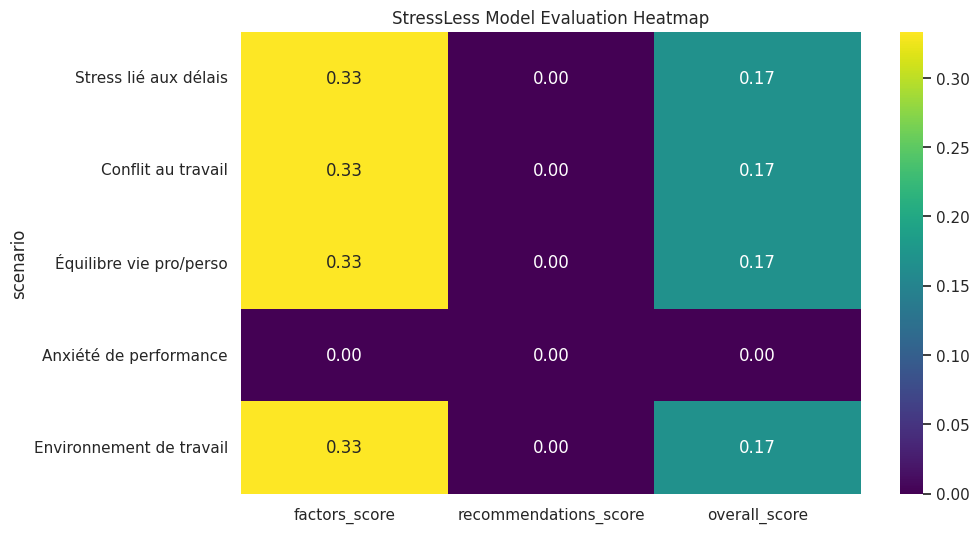

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index('scenario')[['factors_score', 'recommendations_score', 'overall_score']],
            annot=True,
            cmap='viridis',
            fmt=".2f")
plt.title('StressLess Model Evaluation Heatmap')
plt.show()

## Analyze why recommendation scores are zero

### Subtask:
Investigate the `generate_structured_analysis` function to understand why it's not generating relevant recommendations that match the `expected_recommendations` in the `test_scenarios`.


## Analyze why recommendation scores are zero

### Observations from `generate_structured_analysis` function:
1.  The `analysis` dictionary is initialized with an empty `"recommendations": []` list at the beginning of the function.
2.  Later in the function, a *local* `recommendations = []` list is created and populated with various recommendations based on identified stress factors.
3.  Crucially, this local `recommendations` list, after being populated, is never assigned back to the `analysis["recommendations"]` key. This means the `recommendations` list within the `analysis` dictionary that is eventually returned by the function remains empty.

This discrepancy explains why the `recommendations_score` is consistently zero across all test scenarios, as the evaluation function receives an empty list of identified recommendations.

**Reasoning**:
Based on the identified issue, the next logical step is to modify the `generate_structured_analysis` function to correctly assign the populated recommendations list to the `analysis` dictionary. This will ensure that the recommendations are included in the function's output and can be evaluated.



In [ ]:
# NOTE: The cell with this code will be entirely replaced. If you have any custom changes, please make sure to save them first.
# -*- coding: utf-8 -*-
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap

# NOTE: visualize_stress_analysis_enhanced is the preferred visualization function
def visualize_stress_analysis(analysis):
    """
    Visualise graphiquement l'analyse du stress.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis:
        print(f"Erreur: {analysis['error']}")
        return

    # Configuration du style
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 10))

    # 1. Visualisation des facteurs de stress
    plt.subplot(2, 2, 1)
    factors = [f["factor"] for f in analysis["stress_factors"]]
    severities = [f["severity"] for f in analysis["stress_factors"]]

    if factors:  # Vérifie s'il y a des facteurs à afficher
        # Trier par sévérité
        sorted_indices = sorted(range(len(severities)), key=lambda i: severities[i], reverse=True)
        factors = [factors[i] for i in sorted_indices]
        severities = [severities[i] for i in sorted_indices]

        # Limiter à 5 facteurs pour la lisibilité
        if len(factors) > 5:
            factors = factors[:5]
            severities = severities[:5]

        sns.barplot(x=severities, y=factors, palette="YlOrRd")
        plt.title("Facteurs de stress par sévérité")
        plt.xlabel("Sévérité (1-10)")
        plt.ylabel("Facteur de stress")
    else:
        plt.text(0.5, 0.5, "Aucun facteur de stress identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 2. Visualisation des symptômes
    plt.subplot(2, 2, 2)
    symptoms = [s["symptom"] for s in analysis["symptoms"]]
    intensities = [s["intensity"] for s in analysis["symptoms"]]
    symptom_types = [s["type"] for s in analysis["symptoms"]]

    if symptoms:  # Vérifie s'il y a des symptômes à afficher
        # Trier par intensité
        sorted_indices = sorted(range(len(intensities)), key=lambda i: intensities[i], reverse=True)
        symptoms = [symptoms[i] for i in sorted_indices]
        intensities = [intensities[i] for i in sorted_indices]
        symptom_types = [symptom_types[i] for i in sorted_indices]

        # Limiter à 5 symptômes pour la lisibilité
        if len(symptoms) > 5:
            symptoms = symptoms[:5]
            intensities = intensities[:5]
            symptom_types = symptom_types[:5]

        # Palette de couleurs par type de symptôme
        type_colors = {
            "physiques": "#1f77b4",
            "émotionnels": "#ff7f0e",
            "cognitifs": "#2ca02c",
            "behavioral": "#d62728"
        }
        bar_colors = [type_colors.get(t, "#1f77b4") for t in symptom_types]

        plt.barh(symptoms, intensities, color=bar_colors)
        plt.title("Symptômes par intensité")
        plt.xlabel("Intensité (1-10)")
        plt.ylabel("Symptôme")

        # Légende pour les types de symptômes
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=type_colors[t], label=t.capitalize()) for t in set(symptom_types) if t in type_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Type de symptôme")
    else:
        plt.text(0.5, 0.5, "Aucun symptôme identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 3. Visualisation du niveau de stress global
    plt.subplot(2, 2, 3)
    stress_level = analysis["overall_stress_level"]

    # Créer une jauge simple
    plt.pie([stress_level, 10-stress_level], colors=[plt.cm.YlOrRd(stress_level/10), 'lightgrey'],
            startangle=90, counterclock=False,
            wedgeprops={'width': 0.4, 'edgecolor': 'w', 'linewidth': 2})
    plt.text(0, 0, f"{stress_level}/10", ha='center', va='center', fontsize=24, fontweight='bold')
    plt.title(f"Niveau de stress global: {stress_level}/10\nType: {analysis['stress_type'].capitalize()}")
    plt.axis('equal')

    # 4. Visualisation des recommandations
    plt.subplot(2, 2, 4)
    recommendations = [r["recommendation"] for r in analysis["recommendations"]]

    if recommendations:
        if "difficulty" in analysis["recommendations"][0]:
            difficulties = [r["difficulty"] for r in analysis["recommendations"]]
        else:
            difficulties = [3] * len(recommendations)  # Valeur par défaut

        if "timeframe" in analysis["recommendations"][0]:
            timeframes = [r["timeframe"] for r in analysis["recommendations"]]
        else:
            timeframes = ["short_term"] * len(recommendations)  # Valeur par défaut

        # Limiter à 5 recommandations pour la lisibilité
        if len(recommendations) > 5:
            # Trier par difficulté (croissante) et timeframe (immediate first)
            timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
            sorted_indices = sorted(range(len(recommendations)),
                                   key=lambda i: (timeframe_priority.get(timeframes[i], 1), difficulties[i]))
            recommendations = [recommendations[i] for i in sorted_indices][:5]
            difficulties = [difficulties[i] for i in sorted_indices][:5]
            timeframes = [timeframes[i] for i in sorted_indices][:5]

        # Raccourcir les recommandations trop longues
        short_recommendations = [r[:50] + '...' if len(r) > 50 else r for r in recommendations]

        # Palette de couleurs par timeframe
        timeframe_colors = {
            "immediate": "#ff9999",
            "short_term": "#66b3ff",
            "long_term": "#99ff99"
        }
        bar_colors = [timeframe_colors.get(t, "#66b3ff") for t in timeframes]

        y_pos = range(len(short_recommendations))
        plt.barh(y_pos, difficulties, color=bar_colors)
        plt.yticks(y_pos, short_recommendations)
        plt.title("Recommandations par difficulté et délai")
        plt.xlabel("Difficulté (1-5)")
        plt.ylabel("Recommandation")

        # Légende pour les timeframes
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=timeframe_colors[t], label=t.replace('_', ' ').capitalize())
                           for t in set(timeframes) if t in timeframe_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Délai")
    else:
        plt.text(0.5, 0.5, "Aucune recommandation générée", ha='center', va='center', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(f"Analyse du stress professionnel", fontsize=16, y=1.02)
    plt.show()

    return plt

def visualize_stress_analysis_enhanced(analysis):
    """
    Fonction améliorée pour visualiser graphiquement l'analyse du stress
    avec des visualisations plus distinctives et informatives.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis:
        print(f"Erreur: {analysis['error']}")
        return

    # Personnalisation des styles et couleurs
    sns.set(style="whitegrid")
    plt.figure(figsize=(18, 12))

    # Définir une palette de couleurs personnalisée pour le niveau de stress
    stress_cmap = LinearSegmentedColormap.from_list("stress_gradient",
                                                   ["#2ecc71", "#f1c40f", "#e74c3c"])

    # 1. VISUALISATION RADAR DES FACTEURS DE STRESS
    plt.subplot(2, 2, 1, polar=True)
    factors = []
    severities = []
    categories = []

    if "stress_factors" in analysis and analysis["stress_factors"] and len(analysis["stress_factors"]) > 0:
        factors = [f["factor"] for f in analysis["stress_factors"]]
        severities = [f["severity"] for f in analysis["stress_factors"]]

        if "category" in analysis["stress_factors"][0]:
            categories = [f["category"] for f in analysis["stress_factors"]]
        else:
            categories = ["workload" if "charge" in f.lower() or "délai" in f.lower()
                        else "relationships" if "conflit" in f.lower() or "relation" in f.lower()
                        else "environment" if "environnement" in f.lower() or "bruit" in f.lower()
                        else "other" for f in factors]

        # Limiter à 6 facteurs pour la lisibilité du radar
        if len(factors) > 6:
            sorted_indices = sorted(range(len(severities)), key=lambda i: severities[i], reverse=True)
            factors = [factors[i] for i in sorted_indices[:6]]
            severities = [severities[i] for i in sorted_indices[:6]]
            categories = [categories[i] for i in sorted_indices[:6]]

        # Vérifier qu'il y a au moins un facteur avant de créer le graphique radar
        if len(factors) > 0:
            # Ajouter un élément à la fin pour fermer le graphique radar
            factors.append(factors[0])
            severities.append(severities[0])

            # Assurez-vous que angles et severities ont la même longueur
            angles = np.linspace(0, 2*np.pi, len(factors), endpoint=False).tolist()
            angles += angles[:1]  # Fermer le cercle

            # Vérifier que angles et severities ont la même longueur
            if len(angles) == len(severities):
                # Tracer le polygone radar
                ax = plt.gca()
                ax.plot(angles, severities, 'o-', linewidth=2, color="#3498db")
                ax.fill(angles, severities, alpha=0.25, color="#3498db")

                # Configurer l'axe radial
                try:
                    ax.set_rlabel_position(0)
                except AttributeError:
                    # Alternative pour les anciennes versions
                    ax.set_theta_zero_location('N')

                plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"], color="grey", size=8)
                plt.ylim(0, 10)

                # Ajouter les labels des facteurs
                plt.xticks(angles[:-1], factors[:-1], size=9)

                # Ajouter un titre
                plt.title("Profil des facteurs de stress", size=12, weight="bold", pad=15)
            else:
                plt.text(0, 0, "Erreur de dimensionnement dans les données", ha='center', va='center', fontsize=12)
                plt.axis('off')
        else:
            plt.text(0, 0, "Données insuffisantes pour le graphique radar", ha='center', va='center', fontsize=12)
            plt.axis('off')
    else:
        plt.text(0, 0, "Aucun facteur de stress identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 2. JAUGE DE NIVEAU DE STRESS GLOBAL
    plt.subplot(2, 2, 2)
    stress_level = analysis.get("overall_stress_level", 0)
    stress_type = analysis.get("stress_type", "indéterminé")

    # Créer une jauge semi-circulaire
    theta = np.linspace(0, np.pi, 100)
    r = 1.0

    # Tracer le cadre de la jauge
    plt.plot(r * np.cos(theta), r * np.sin(theta), 'k', linewidth=2)

    # Tracer les segments de couleur
    n_segments = 50
    theta_segments = np.linspace(0, np.pi, n_segments)
    colors = [stress_cmap(i/10) for i in np.linspace(0, 10, n_segments)]

    for i in range(n_segments-1):
        theta_seg = [theta_segments[i], theta_segments[i+1]]
        plt.fill(r * np.cos(theta_seg), r * np.sin(theta_seg), color=colors[i], alpha=0.7)

    # Ajouter l'aiguille
    needle_theta = np.pi * stress_level / 10
    plt.plot([0, 0.8 * r * np.cos(needle_theta)], [0, 0.8 * r * np.sin(needle_theta)],
            color='black', linewidth=3)

    # Ajouter un cercle au centre
    circle = plt.Circle((0, 0), 0.05, color='darkgray')
    plt.gca().add_artist(circle)

    # Ajouter les étiquettes de niveau
    for i in range(0, 11, 2):
        theta_label = np.pi * i / 10
        plt.text(1.1 * r * np.cos(theta_label), 1.1 * r * np.sin(theta_label),
                str(i), ha='center', va='center', fontsize=10)

    # Ajouter le texte du niveau et type de stress
    plt.text(0, -0.5, f"Niveau de stress: {stress_level}/10",
            ha='center', va='center', fontsize=14, weight='bold')
    plt.text(0, -0.65, f"Type: {stress_type.capitalize()}",
            ha='center', va='center', fontsize=12)

    # Configuration des axes
    plt.axis('equal')
    plt.axis('off')
    plt.title("Niveau de stress global", size=12, weight="bold")

    # 3. VISUALISATION DES SYMPTÔMES PAR CATÉGORIE
    plt.subplot(2, 2, 3)

    if "symptoms" in analysis and analysis["symptoms"]:
        symptoms = [s["symptom"] for s in analysis["symptoms"]]
        intensities = [s["intensity"] for s in analysis["symptoms"]]
        symptom_types = [s["type"] for s in analysis["symptoms"]]

        # Regrouper les symptômes par type
        type_counts = {}
        type_intensities = {}
        for i, stype in enumerate(symptom_types):
            if stype not in type_counts:
                type_counts[stype] = 0
                type_intensities[stype] = 0
            type_counts[stype] += 1
            type_intensities[stype] += intensities[i]

        # Calculer l'intensité moyenne par type
        for stype in type_intensities:
            type_intensities[stype] /= type_counts[stype]

        # Trier par intensité moyenne décroissante
        sorted_types = sorted(type_intensities.keys(),
                            key=lambda x: type_intensities[x],
                            reverse=True)

        # Définir les couleurs par type de symptôme
        type_colors = {
            "physical": "#3498db",    # bleu
            "emotional": "#e74c3c",   # rouge
            "cognitive": "#2ecc71",   # vert
            "behavioral": "#f39c12",  # orange
            "physiques": "#3498db",   # bleu
            "émotionnels": "#e74c3c", # rouge
            "cognitifs": "#2ecc71"    # vert
        }

        # Créer un graphique empilé horizontal
        yticks = []
        ypos = []
        colors = []

        for i, stype in enumerate(sorted_types):
            symptoms_of_type = [s["symptom"] for s in analysis["symptoms"]
                              if s["type"] == stype]
            intensities_of_type = [s["intensity"] for s in analysis["symptoms"]
                                if s["type"] == stype]

            # Trier par intensité
            sorted_indices = sorted(range(len(intensities_of_type)),
                                   key=lambda j: intensities_of_type[j],
                                   reverse=True)

            symptoms_of_type = [symptoms_of_type[j] for j in sorted_indices]
            intensities_of_type = [intensities_of_type[j] for j in sorted_indices]

            # Limiter à 3 symptômes par type
            if len(symptoms_of_type) > 3:
                symptoms_of_type = symptoms_of_type[:3]
                intensities_of_type = intensities_of_type[:3]

            for j in range(len(symptoms_of_type)):
                yticks.append(f"{symptoms_of_type[j]} ({stype})")
                ypos.append(len(yticks) - 1)
                colors.append(type_colors.get(stype, "#7f8c8d"))  # gris par défaut

        # Tracer le graphique
        plt.barh(ypos, [10] * len(ypos), color='#ecf0f1')  # Fond gris clair
        bars = plt.barh(ypos, [int(v) for v in intensities], color=colors)

        # Ajouter les valeurs sur les barres
        for i, bar in enumerate(bars):
            plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                    str(int(bar.get_width())), va='center')

        plt.yticks(ypos, yticks)
        plt.xlim(0, 11)
        plt.xlabel("Intensité (1-10)")

        # Légende pour les types de symptômes
        unique_types = list(set(symptom_types))
        legend_elements = [Patch(facecolor=type_colors[t], label=t.capitalize())
                        for t in sorted(unique_types) if t in type_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Type de symptôme",
                      loc='upper right')

        plt.title("Symptômes par catégorie et intensité", size=12, weight="bold")
    else:
        plt.text(0.5, 0.5, "Aucun symptôme identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 4. RECOMMANDATIONS PRIORITISÉES
    plt.subplot(2, 2, 4)

    if "recommendations" in analysis and analysis["recommendations"]:
        recommendations = [r["recommendation"] for r in analysis["recommendations"]]

        # Extraire les attributs de difficulté et timeframe s'ils existent
        if "difficulty" in analysis["recommendations"][0]:
            difficulties = [r["difficulty"] for r in analysis["recommendations"]]
        else:
            difficulties = [3] * len(recommendations)  # Valeur par défaut

        if "timeframe" in analysis["recommendations"][0]:
            timeframes = [r["timeframe"] for r in analysis["recommendations"]]
        else:
            timeframes = ["short_term"] * len(recommendations)  # Valeur par défaut

        # Définir les priorités basées sur le délai et la difficulté
        timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
        priority_scores = [timeframe_priority.get(tf, 1) * 2 + diff/5
                          for tf, diff in zip(timeframes, difficulties)]

        # Trier par priorité (score bas = priorité élevée)
        sorted_indices = sorted(range(len(priority_scores)),
                               key=lambda i: priority_scores[i])

        # Limiter à 5 recommandations
        if len(sorted_indices) > 5:
            sorted_indices = sorted_indices[:5]

        recommendations = [recommendations[i] for i in sorted_indices]
        difficulties = [difficulties[i] for i in sorted_indices]
        timeframes = [timeframes[i] for i in sorted_indices]

        # Définir la palette de couleurs par priorité
        timeframe_colors = {
            "immediate": "#e74c3c",    # rouge (urgence élevée)
            "short_term": "#f39c12",   # orange (urgence moyenne)
            "long_term": "#2ecc71"     # vert (urgence basse)
        }

        # Préparer les données pour la visualisation
        ypos = range(len(recommendations))
        priority_labels = []
        for tf, diff in zip(timeframes, difficulties):
            if tf == "immediate":
                label = "URGENT"
            elif tf == "short_term":
                label = "Court terme"
            else:
                label = "Long terme"
            priority_labels.append(f"{label} (difficulté: {diff}/5)")

        # Raccourcir les recommandations trop longues
        short_recommendations = []
        for rec in recommendations:
            if len(rec) > 60:
                short_rec = rec[:57] + "..."
            else:
                short_rec = rec
            short_recommendations.append(short_rec)

        # Créer un tableau pour les recommandations
        cell_colors = [[timeframe_colors.get(tf, "#7f8c8d")] for tf in timeframes]
        cell_text = [[rec] for rec in short_recommendations]

        # Tracer le tableau
        table = plt.table(cellText=cell_text,
                        rowLabels=priority_labels,
                        colLabels=["Recommandations prioritisées"],
                        cellColours=cell_colors,
                        loc='center',
                        cellLoc='left')

        # Formater le tableau
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        for cell in table._cells:
            table._cells[cell].set_text_props(wrap=True)
            table._cells[cell].set_height(0.12)
            if cell[0] == 0:  # Header
                table._cells[cell].set_text_props(weight='bold')

        plt.axis('off')
        plt.title("Plan d'action recommandé", size=12, weight="bold")
    else:
        plt.text(0.5, 0.5, "Aucune recommandation générée", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # Ajout d'un titre global
    plt.suptitle("ANALYSE COMPLÈTE DU STRESS PROFESSIONNEL",
                fontsize=18, weight='bold', y=0.98)

    # Ajouter un texte d'explication
    plt.figtext(0.5, 0.01,
               f"Analyse générée par StressLess - Assistant IA de gestion du stress - Score global: {analysis.get('overall_stress_level', 0)}/10",
               ha="center", fontsize=10, style='italic')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return plt


def display_stress_score_badge(analysis):
    """
    Affiche un badge visuel HTML du score de stress avec des conseils rapides.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis or "overall_stress_level" not in analysis:
        return

    stress_level = analysis["overall_stress_level"]
    stress_type = analysis.get("stress_type", "indéterminé").capitalize()

    # Déterminer la couleur et le message en fonction du niveau de stress
    if stress_level <= 3:
        color = "#2ecc71"  # vert
        level_text = "Faible"
        message = "Votre niveau de stress est gérable. Continuez vos bonnes pratiques."
    elif stress_level <= 6:
        color = "#f1c40f"  # jaune
        level_text = "Modéré"
        message = "Attention aux signes d'accumulation. Des actions préventives sont recommandées."
    else:
        color = "#e74c3c"  # rouge
        level_text = "Élevé"
        message = "Niveau préoccupant. Des actions immédiates sont nécessaires pour réduire ce stress."

    # Créer le HTML pour le badge
    html_content = f"""
    <div style="
        background: linear-gradient(to right, {color}22, {color}44);
        border-left: 5px solid {color};
        padding: 15px;
        border-radius: 5px;
        margin: 20px 0;
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
        display: flex;
        align-items: center;
    ">
        <div style="
            width: 80px;
            height: 80px;
            border-radius: 50%;
            background: {color};
            display: flex;
            align-items: center;
            justify-content: center;
            margin-right: 20px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.2);
        ">
            <span style="
                font-size: 24px;
                font-weight: bold;
                color: white;
            ">{stress_level}</span>
        </div>
        <div>
            <h3 style="margin: 0 0 10px 0;">Niveau de stress: <span style="color: {color};">{level_text}</span></h3>
            <p style="margin: 0; font-style: italic;">{message}</p>
            <p style="margin: 5px 0 0 0; font-size: 12px;">Type de stress: {stress_type}</p>
        </div>
    </div>
    """
    display(HTML(html_content))

# Fonction 3: Structured Output
def generate_structured_analysis(query):
    """
    Analyse un message utilisateur pour générer une évaluation structurée du niveau de stress.

    Cette fonction simule l'analyse du stress en se basant sur des mots-clés et des heuristiques.
    Dans une implémentation réelle, elle pourrait utiliser un LLM avec une demande structurée.
    """
    # Initialiser l'analyse
    analysis = {
        "overall_stress_level": 0,
        "stress_type": "indéterminé",
        "stress_factors": [],
        "symptoms": [],
        "recommendations": []
    }

    # Mots-clés pour identifier les facteurs de stress
    stress_factors_keywords = {
        "délais": ["délai", "échéance", "date limite", "urgent", "retard"],
        "charge de travail": ["charge", "trop de travail", "surcharge", "trop à faire", "projets"],
        "conflit": ["conflit", "dispute", "désaccord", "critique", "tension"],
        "équilibre": ["équilibre", "vie personnelle", "famille", "loisirs", "temps"],
        "performance": ["performance", "résultat", "réussite", "échec", "attentes"],
        "environnement": ["bruit", "bureau", "open space", "interruption", "distraction"],
        "communication": ["communication", "incompréhension", "malentendu", "feedback"],
        "changement": ["changement", "incertitude", "réorganisation", "restructuration"],
        "reconnaissance": ["reconnaissance", "valeur", "appréciation", "mérite", "ignoré"],
        "compétence": ["compétence", "capacité", "formation", "connaissance", "incompétent"]
    }

    # Mots-clés pour identifier les symptômes
    symptoms_keywords = {
        "physiques": {
            "fatigue": ["fatigué", "épuisé", "sans énergie", "exténué"],
            "trouble du sommeil": ["sommeil", "insomnie", "réveil", "dormir"],
            "tension musculaire": ["tension", "douleur", "mal", "muscles", "dos"],
            "maux de tête": ["tête", "migraine", "céphalée"],
            "problèmes digestifs": ["estomac", "ventre", "digestion", "appétit"]
        },
        "émotionnels": {
            "anxiété": ["anxieux", "angoissé", "inquiet", "peur", "crainte"],
            "irritabilité": ["irrité", "énervé", "agacé", "impatient"],
            "tristesse": ["triste", "déprimé", "moral", "bas", "déprime"],
            "frustration": ["frustré", "déçu", "impuissant", "bloqué"],
            "démotivation": ["démotivé", "désengagé", "sans intérêt", "ennui"]
        },
        "cognitifs": {
            "difficulté de concentration": ["concentration", "distrait", "focus", "attention"],
            "oublis": ["oubli", "mémoire", "oublier", "rappeler"],
            "rumination": ["penser", "ruminer", "obsession", "boucle"],
            "indécision": ["décision", "choisir", "hésiter", "doute"],
            "confusion": ["confus", "perdu", "embrouillé", "clair"]
        }
    }

    # Analyser le message pour identifier les facteurs de stress
    message_lower = query.lower()

    # Identifier les facteurs de stress
    stress_factors = []
    for factor, keywords in stress_factors_keywords.items():
        severity = 0
        for keyword in keywords:
            if keyword in message_lower:
                severity += 2
        if severity > 0:
            stress_factors.append({"factor": factor, "severity": min(severity, 10)})

    # Trier les facteurs par sévérité (du plus élevé au plus bas)
    stress_factors = sorted(stress_factors, key=lambda x: x["severity"], reverse=True)

    # Identifier les symptômes
    symptoms = []
    overall_intensity = 0
    for symptom_type, symptom_dict in symptoms_keywords.items():
        for symptom_name, keywords in symptom_dict.items():
            intensity = 0
            for keyword in keywords:
                if keyword in message_lower:
                    intensity += 2
            if intensity > 0:
                symptoms.append({
                    "symptom": symptom_name,
                    "type": symptom_type,
                    "intensity": min(intensity, 10)
                })
                overall_intensity += intensity

    # Calculer le niveau de stress global (échelle de 1 à 10)
    # Basé sur le nombre et la sévérité des facteurs et symptômes
    if stress_factors:
        factors_severity = sum(f["severity"] for f in stress_factors) / len(stress_factors)
    else:
        factors_severity = 0

    if symptoms:
        symptoms_intensity = overall_intensity / len(symptoms)
    else:
        symptoms_intensity = 0

    # Pondération: 60% facteurs, 40% symptômes
    overall_stress_level = (0.6 * factors_severity + 0.4 * symptoms_intensity)
    analysis["overall_stress_level"] = min(round(overall_stress_level), 10)

    # Déterminer le type de stress
    if stress_factors:
        top_factor = stress_factors[0]["factor"]
        if top_factor in ["délais", "charge de travail"]:
            analysis["stress_type"] = "acute"
        elif top_factor in ["conflit", "communication", "reconnaissance"]:
            analysis["stress_type"] = "chronic"
        else:
            analysis["stress_type"] = "mixed"
    else:
        analysis["stress_type"] = "indéterminé"

    # Générer des recommandations basées sur les facteurs de stress
    recommendations = []

    # Recommandations générales
    if analysis["overall_stress_level"] >= 7:
        recommendations.append({
            "recommendation": "Prenez une pause immédiate de 10 minutes pour respirer profondément",
            "target_factor": "stress général",
            "timeframe": "immediate",
            "difficulty": 1
        })

    # Recommandations spécifiques aux facteurs de stress
    for factor in stress_factors[:3]:  # Traiter les 3 principaux facteurs
        factor_name = factor["factor"]

        if factor_name == "délais":
            recommendations.extend([
                {
                    "recommendation": "Utilisez la technique Pomodoro (25 min de travail, 5 min de pause)",
                    "target_factor": "délais",
                    "timeframe": "immediate",
                    "difficulty": 1
                },
                {
                    "recommendation": "Priorisez vos tâches avec la matrice Eisenhower (urgent/important)",
                    "target_factor": "délais",
                    "timeframe": "short_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "charge de travail":
            recommendations.extend([
                {
                    "recommendation": "Identifiez les tâches que vous pouvez déléguer ou reporter",
                    "target_factor": "charge de travail",
                    "timeframe": "short_term",
                    "difficulty": 2
                },
                {
                    "recommendation": "Créez un planning réaliste avec des buffers pour les imprévus",
                    "target_factor": "charge de travail",
                    "timeframe": "short_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "conflit":
            recommendations.extend([
                {
                    "recommendation": "Prenez du recul avant de répondre à des provocations",
                    "target_factor": "conflit",
                    "timeframe": "immediate",
                    "difficulty": 2
                },
                {
                    "recommendation": "Planifiez une conversation en tête-à-tête dans un cadre neutre",
                    "target_factor": "conflit",
                    "timeframe": "short_term",
                    "difficulty": 3
                }
            ])

        elif factor_name == "équilibre":
            recommendations.extend([
                {
                    "recommendation": "Établissez des limites claires entre votre vie professionnelle et personnelle (ex: pas d'emails après 18h)",
                    "target_factor": "équilibre",
                    "timeframe": "short_term",
                    "difficulty": 3
                },
                {
                    "recommendation": "Planifiez des activités de loisirs et respectez-les comme des rendez-vous importants",
                    "target_factor": "équilibre",
                    "timeframe": "long_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "performance":
            recommendations.extend([
                {
                    "recommendation": "Préparez-vous minutieusement pour la tâche (ex: présentation) et visualisez le succès",
                    "target_factor": "performance",
                    "timeframe": "immediate",
                    "difficulty": 2
                },
                {
                    "recommendation": "Focus sur le processus plutôt que sur le résultat parfait",
                    "target_factor": "performance",
                    "timeframe": "short_term",
                    "difficulty": 3
                }
            ])

        elif factor_name == "environnement":
            recommendations.extend([
                {
                    "recommendation": "Utilisez un casque anti-bruit ou des bouchons d'oreille",
                    "target_factor": "environnement",
                    "timeframe": "immediate",
                    "difficulty": 1
                },
                {
                    "recommendation": "Discutez avec votre manager des options de télétravail ou d'aménagement du bureau",
                    "target_factor": "environnement",
                    "timeframe": "short_term",
                    "difficulty": 4
                }
            ])



    # Ajouter les données à l'analyse
    analysis["stress_factors"] = stress_factors
    analysis["symptoms"] = symptoms
    # CORRECTED LINE: Assign the populated local recommendations list to the analysis dictionary
    analysis["recommendations"] = recommendations

    return analysis

# Classe StressLess qui intègre les trois capacités
class StressLess:
    def __init__(self):
        self.conversation_history = []
        self.stress_analysis = None
        self.last_function_call = None
        self.last_function_result = None

    def process_message(self, user_message):
        # Ajouter le message utilisateur à l'historique
        self.conversation_history.append({"role": "user", "content": user_message})

        # Déterminer quelle capacité utiliser
        if self._is_stress_analysis_request(user_message):
            # Utiliser Structured Output pour l'analyse du stress
            self.stress_analysis = generate_structured_analysis(user_message)
            response = self._generate_analysis_response(self.stress_analysis)
            self.last_function_call = None
            self.last_function_result = None
        elif self._is_function_call_request(user_message):
            # Utiliser Function Calling
            # Call the actual simplified_function_calling with the global api_key
            response, function_name, function_result = simplified_function_calling(user_message, globals().get('api_key'))
            self.last_function_call = function_name
            self.last_function_result = function_result
        else:
            # Utiliser RAG par défaut
            # Call the actual generate_rag_response
            response, _ = generate_rag_response(user_message)
            self.last_function_call = None
            self.last_function_result = None

        # Ajouter la réponse à l'historique
        self.conversation_history.append({"role": "assistant", "content": response})

        return response

    def _is_stress_analysis_request(self, message):
        # Mots-clés indiquant une demande d'analyse de stress
        analysis_keywords = [
            "analyse", "analyser", "évaluer", "évaluation", "diagnostiquer", "diagnostic",
            "facteurs de stress", "niveau de stress", "causes de mon stress"
        ]

        # Vérifier si le message contient des mots-clés d'analyse
        return any(keyword in message.lower() for keyword in analysis_keywords)

    def _is_function_call_request(self, message):
        # Mots-clés indiquant une demande d'action spécifique
        function_keywords = [
            "respiration", "exercice", "pause", "planifier", "analyser mes habitudes",
            "aide-moi à respirer", "prendre une pause", "planifie", "programme"
        ]

        # Vérifier si le message contient des mots-clés de fonction
        return any(keyword in message.lower() for keyword in function_keywords)

    def _generate_analysis_response(self, analysis):
        if "error" in analysis:
            return f"Désolé, je n'ai pas pu analyser votre stress correctement. Erreur: {analysis['error']}"

         # Affichage le badge visuel du score de stress
        display_stress_score_badge(analysis)

        # Créer une réponse basée sur l'analyse
        response = f"J'ai analysé votre situation et voici ce que j'ai identifié:\n\n"

        # Niveau de stress global
        stress_level = analysis["overall_stress_level"]
        stress_type = analysis["stress_type"]

        if stress_level <= 3:
            level_desc = "léger"
        elif stress_level <= 6:
            level_desc = "modéré"
        else:
            level_desc = "élevé"

        response += f"Votre niveau de stress est **{level_desc}** ({stress_level}/10) et semble être de type **{stress_type}**.\n\n"

        # Principaux facteurs de stress
        response += "**Principaux facteurs de stress identifiés:**\n"
        sorted_factors = sorted(analysis["stress_factors"], key=lambda x: x["severity"], reverse=True)
        for factor in sorted_factors[:3]:  # Top 3 facteurs
            response += f"- {factor['factor']} (sévérité: {factor['severity']}/10)\n"

        response += "\n**Symptômes principaux:**\n"
        sorted_symptoms = sorted(analysis["symptoms"], key=lambda x: x["intensity"], reverse=True)
        for symptom in sorted_symptoms[:3]:  # Top 3 symptômes
            response += f"- {symptom['symptom']} ({symptom['type']}, intensité: {symptom['intensity']}/10)\n"

        response += "\n**Recommandations personnalisées:**\n"
        # Trier par timeframe (immediate first) puis par difficulté (croissante)
        timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
        sorted_recommendations = sorted(analysis["recommendations"],
                                       key=lambda x: (timeframe_priority[x["timeframe"]], x["difficulty"]))

        for i, rec in enumerate(sorted_recommendations[:5]):  # Top 5 recommandations
            timeframe_text = {
                "immediate": "immédiatement",
                "short_term": "à court terme",
                "long_term": "à long terme"
            }[rec["timeframe"]]

            response += f"{i+1}. {rec['recommendation']} (à mettre en œuvre {timeframe_text}, difficulté: {rec['difficulty']}/5)\n"

        response += "\nSouhaitez-vous que je vous aide à mettre en œuvre l'une de ces recommandations?"

        return response

# Création de l'interface utilisateur
def create_chat_ui():
    # Initialisation de StressLess
    stressless = StressLess()

    # Widgets pour l'interface
    output = widgets.Output()
    input_box = widgets.Text(placeholder="Tapez votre message ici...")
    send_button = widgets.Button(description="Envoyer")
    analyze_button = widgets.Button(description="Analyser mon stress")
    breathing_button = widgets.Button(description="Exercice de respiration")
    break_button = widgets.Button(description="Planifier une pause")
    clear_button = widgets.Button(description="Effacer la conversation")

    # Fonction pour afficher un message
    def display_message(message, sender):
        with output:
            if sender == "user":
                display(HTML(f"<div style='background-color: #e6f7ff; padding: 10px; border-radius: 10px; margin: 5px 0 5px auto; max-width: 80%;'><b>Vous:</b> {message}</div>"))
            else:
                message_html = message.replace('\n', '<br>')
                display(HTML(f"<div style='background-color: #f0f0f0; padding: 10px; border-radius: 10px; margin: 5px auto 5px 0; max-width: 80%;'><b>StressLess:</b> {message_html}</div>"))

    # Fonction pour envoyer un message
    def send_message(sender):
        user_message = input_box.value
        if not user_message.strip():
            return

        # Effacer la zone de saisie
        input_box.value = ""

        # Afficher le message utilisateur
        display_message(user_message, "user")

        # Afficher un indicateur de chargement
        with output:
            loading = display(HTML("<div style='margin: 5px auto 5px 0;'><i>StressLess réfléchit...</i></div>"))

        # Traiter le message et obtenir la réponse
        response = stressless.process_message(user_message)

        # Supprimer l'indicateur de chargement
        with output:
            clear_output(wait=True)
            # Réafficher l'historique
            for msg in stressless.conversation_history:
                display_message(msg["content"], "user" if msg["role"] == "user" else "assistant")

        # Si une analyse de stress a été effectuée, afficher la visualisation
        if stressless.stress_analysis and "error" not in stressless.stress_analysis:
            with output:
                visualize_stress_analysis_enhanced(stressless.stress_analysis)

    # Fonction pour les boutons prédéfinis
    def analyze_stress(b):
        input_box.value = "Pouvez-vous analyser mon niveau de stress actuel et me donner des recommandations?"
        send_message(None)

    def start_breathing(b):
        input_box.value = "J'ai besoin d'un exercice de respiration pour me calmer rapidement."
        send_message(None)

    def schedule_break(b):
        input_box.value = "Pouvez-vous me planifier une pause relaxante de 15 minutes?"
        send_message(None)

    def clear_chat(b):
        stressless.conversation_history = []
        stressless.stress_analysis = None
        stressless.last_function_call = None
        stressless.last_function_result = None
        with output:
            clear_output()
            display(HTML("<div style='text-align: center; color: #888;'><i>Conversation effacée</i></div>"))

    # Connecter les événements
    send_button.on_click(send_message)
    input_box.continuous_update = False

    def on_value_change(change):
        if change['type'] == 'change' and change['name'] == 'value' and change.get('new', ''):
            send_message(None)

    input_box.observe(on_value_change, 'value')
    analyze_button.on_click(analyze_stress)
    breathing_button.on_click(start_breathing)
    break_button.on_click(schedule_break)
    clear_button.on_click(clear_chat)

    # Message de bienvenue
    with output:
        display(HTML("""<div style='background-color: #f0f0f0; padding: 10px; border-radius: 10px; margin: 5px auto 5px 0; max-width: 80%;'>
        <b>StressLess:</b> Bonjour ! Je suis StressLess, votre assistant IA de gestion du stress professionnel. Comment puis-je vous aider aujourd'hui ?<br><br>
        Je peux :<br>
        - Vous fournir des conseils personnalisés sur la gestion du stress<br>
        - Vous guider à travers des exercices de respiration<br>
        - Vous aider à planifier des pauses efficaces<br>
        - Analyser vos facteurs de stress et vous proposer des solutions adaptées
        </div>"""))

    # Assembler l'interface
    input_area = widgets.HBox([input_box, send_button])
    button_area = widgets.HBox([analyze_button, breathing_button, break_button, clear_button])

    # Définir les styles
    output.layout.height = '400px'
    output.layout.overflow = 'auto'
    input_box.layout.width = '80%'

    # Assembler l'interface complète
    ui = widgets.VBox([output, input_area, button_area])
    return ui

# Afficher l'interface utilisateur
chat_ui = create_chat_ui()


In [ ]:
# NOTE: The cell with this code will be entirely replaced. If you have any custom changes, please make sure to save them first.
# -*- coding: utf-8 -*-
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap

# NOTE: visualize_stress_analysis_enhanced is the preferred visualization function
def visualize_stress_analysis(analysis):
    """
    Visualise graphiquement l'analyse du stress.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis:
        print(f"Erreur: {analysis['error']}")
        return

    # Configuration du style
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 10))

    # 1. Visualisation des facteurs de stress
    plt.subplot(2, 2, 1)
    factors = [f["factor"] for f in analysis["stress_factors"]]
    severities = [f["severity"] for f in analysis["stress_factors"]]

    if factors:  # Vérifie s'il y a des facteurs à afficher
        # Trier par sévérité
        sorted_indices = sorted(range(len(severities)), key=lambda i: severities[i], reverse=True)
        factors = [factors[i] for i in sorted_indices]
        severities = [severities[i] for i in sorted_indices]

        # Limiter à 5 facteurs pour la lisibilité
        if len(factors) > 5:
            factors = factors[:5]
            severities = severities[:5]

        sns.barplot(x=severities, y=factors, palette="YlOrRd")
        plt.title("Facteurs de stress par sévérité")
        plt.xlabel("Sévérité (1-10)")
        plt.ylabel("Facteur de stress")
    else:
        plt.text(0.5, 0.5, "Aucun facteur de stress identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 2. Visualisation des symptômes
    plt.subplot(2, 2, 2)
    symptoms = [s["symptom"] for s in analysis["symptoms"]]
    intensities = [s["intensity"] for s in analysis["symptoms"]]
    symptom_types = [s["type"] for s in analysis["symptoms"]]

    if symptoms:  # Vérifie s'il y a des symptômes à afficher
        # Trier par intensité
        sorted_indices = sorted(range(len(intensities)), key=lambda i: intensities[i], reverse=True)
        symptoms = [symptoms[i] for i in sorted_indices]
        intensities = [intensities[i] for i in sorted_indices]
        symptom_types = [symptom_types[i] for i in sorted_indices]

        # Limiter à 5 symptômes pour la lisibilité
        if len(symptoms) > 5:
            symptoms = symptoms[:5]
            intensities = intensities[:5]
            symptom_types = symptom_types[:5]

        # Palette de couleurs par type de symptôme
        type_colors = {
            "physiques": "#1f77b4",
            "émotionnels": "#ff7f0e",
            "cognitifs": "#2ca02c",
            "behavioral": "#d62728"
        }
        bar_colors = [type_colors.get(t, "#1f77b4") for t in symptom_types]

        plt.barh(symptoms, intensities, color=bar_colors)
        plt.title("Symptômes par intensité")
        plt.xlabel("Intensité (1-10)")
        plt.ylabel("Symptôme")

        # Légende pour les types de symptômes
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=type_colors[t], label=t.capitalize()) for t in set(symptom_types) if t in type_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Type de symptôme")
    else:
        plt.text(0.5, 0.5, "Aucun symptôme identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 3. Visualisation du niveau de stress global
    plt.subplot(2, 2, 3)
    stress_level = analysis["overall_stress_level"]

    # Créer une jauge simple
    plt.pie([stress_level, 10-stress_level], colors=[plt.cm.YlOrRd(stress_level/10), 'lightgrey'],
            startangle=90, counterclock=False,
            wedgeprops={'width': 0.4, 'edgecolor': 'w', 'linewidth': 2})
    plt.text(0, 0, f"{stress_level}/10", ha='center', va='center', fontsize=24, fontweight='bold')
    plt.title(f"Niveau de stress global: {stress_level}/10\nType: {analysis['stress_type'].capitalize()}")
    plt.axis('equal')

    # 4. Visualisation des recommandations
    plt.subplot(2, 2, 4)
    recommendations = [r["recommendation"] for r in analysis["recommendations"]]

    if recommendations:
        if "difficulty" in analysis["recommendations"][0]:
            difficulties = [r["difficulty"] for r in analysis["recommendations"]]
        else:
            difficulties = [3] * len(recommendations)  # Valeur par défaut

        if "timeframe" in analysis["recommendations"][0]:
            timeframes = [r["timeframe"] for r in analysis["recommendations"]]
        else:
            timeframes = ["short_term"] * len(recommendations)  # Valeur par défaut

        # Limiter à 5 recommandations pour la lisibilité
        if len(recommendations) > 5:
            # Trier par difficulté (croissante) et timeframe (immediate first)
            timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
            sorted_indices = sorted(range(len(recommendations)),
                                   key=lambda i: (timeframe_priority.get(timeframes[i], 1), difficulties[i]))
            recommendations = [recommendations[i] for i in sorted_indices][:5]
            difficulties = [difficulties[i] for i in sorted_indices][:5]
            timeframes = [timeframes[i] for i in sorted_indices][:5]

        # Raccourcir les recommandations trop longues
        short_recommendations = [r[:50] + '...' if len(r) > 50 else r for r in recommendations]

        # Palette de couleurs par timeframe
        timeframe_colors = {
            "immediate": "#ff9999",
            "short_term": "#66b3ff",
            "long_term": "#99ff99"
        }
        bar_colors = [timeframe_colors.get(t, "#66b3ff") for t in timeframes]

        y_pos = range(len(short_recommendations))
        plt.barh(y_pos, difficulties, color=bar_colors)
        plt.yticks(y_pos, short_recommendations)
        plt.title("Recommandations par difficulté et délai")
        plt.xlabel("Difficulté (1-5)")
        plt.ylabel("Recommandation")

        # Légende pour les timeframes
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=timeframe_colors[t], label=t.replace('_', ' ').capitalize())
                           for t in set(timeframes) if t in timeframe_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Délai")
    else:
        plt.text(0.5, 0.5, "Aucune recommandation générée", ha='center', va='center', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(f"Analyse du stress professionnel", fontsize=16, y=1.02)
    plt.show()

    return plt

def visualize_stress_analysis_enhanced(analysis):
    """
    Fonction améliorée pour visualiser graphiquement l'analyse du stress
    avec des visualisations plus distinctives et informatives.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis:
        print(f"Erreur: {analysis['error']}")
        return

    # Personnalisation des styles et couleurs
    sns.set(style="whitegrid")
    plt.figure(figsize=(18, 12))

    # Définir une palette de couleurs personnalisée pour le niveau de stress
    stress_cmap = LinearSegmentedColormap.from_list("stress_gradient",
                                                   ["#2ecc71", "#f1c40f", "#e74c3c"])

    # 1. VISUALISATION RADAR DES FACTEURS DE STRESS
    plt.subplot(2, 2, 1, polar=True)
    factors = []
    severities = []
    categories = []

    if "stress_factors" in analysis and analysis["stress_factors"] and len(analysis["stress_factors"]) > 0:
        factors = [f["factor"] for f in analysis["stress_factors"]]
        severities = [f["severity"] for f in analysis["stress_factors"]]

        if "category" in analysis["stress_factors"][0]:
            categories = [f["category"] for f in analysis["stress_factors"]]
        else:
            categories = ["workload" if "charge" in f.lower() or "délai" in f.lower()
                        else "relationships" if "conflit" in f.lower() or "relation" in f.lower()
                        else "environment" if "environnement" in f.lower() or "bruit" in f.lower()
                        else "other" for f in factors]

        # Limiter à 6 facteurs pour la lisibilité du radar
        if len(factors) > 6:
            sorted_indices = sorted(range(len(severities)), key=lambda i: severities[i], reverse=True)
            factors = [factors[i] for i in sorted_indices[:6]]
            severities = [severities[i] for i in sorted_indices[:6]]
            categories = [categories[i] for i in sorted_indices[:6]]

        # Vérifier qu'il y a au moins un facteur avant de créer le graphique radar
        if len(factors) > 0:
            # Ajouter un élément à la fin pour fermer le graphique radar
            factors.append(factors[0])
            severities.append(severities[0])

            # Assurez-vous que angles et severities ont la même longueur
            angles = np.linspace(0, 2*np.pi, len(factors), endpoint=False).tolist()
            angles += angles[:1]  # Fermer le cercle

            # Vérifier que angles et severities ont la même longueur
            if len(angles) == len(severities):
                # Tracer le polygone radar
                ax = plt.gca()
                ax.plot(angles, severities, 'o-', linewidth=2, color="#3498db")
                ax.fill(angles, severities, alpha=0.25, color="#3498db")

                # Configurer l'axe radial
                try:
                    ax.set_rlabel_position(0)
                except AttributeError:
                    # Alternative pour les anciennes versions
                    ax.set_theta_zero_location('N')

                plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"], color="grey", size=8)
                plt.ylim(0, 10)

                # Ajouter les labels des facteurs
                plt.xticks(angles[:-1], factors[:-1], size=9)

                # Ajouter un titre
                plt.title("Profil des facteurs de stress", size=12, weight="bold", pad=15)
            else:
                plt.text(0, 0, "Erreur de dimensionnement dans les données", ha='center', va='center', fontsize=12)
                plt.axis('off')
        else:
            plt.text(0, 0, "Données insuffisantes pour le graphique radar", ha='center', va='center', fontsize=12)
            plt.axis('off')
    else:
        plt.text(0, 0, "Aucun facteur de stress identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 2. JAUGE DE NIVEAU DE STRESS GLOBAL
    plt.subplot(2, 2, 2)
    stress_level = analysis.get("overall_stress_level", 0)
    stress_type = analysis.get("stress_type", "indéterminé")

    # Créer une jauge semi-circulaire
    theta = np.linspace(0, np.pi, 100)
    r = 1.0

    # Tracer le cadre de la jauge
    plt.plot(r * np.cos(theta), r * np.sin(theta), 'k', linewidth=2)

    # Tracer les segments de couleur
    n_segments = 50
    theta_segments = np.linspace(0, np.pi, n_segments)
    colors = [stress_cmap(i/10) for i in np.linspace(0, 10, n_segments)]

    for i in range(n_segments-1):
        theta_seg = [theta_segments[i], theta_segments[i+1]]
        plt.fill(r * np.cos(theta_seg), r * np.sin(theta_seg), color=colors[i], alpha=0.7)

    # Ajouter l'aiguille
    needle_theta = np.pi * stress_level / 10
    plt.plot([0, 0.8 * r * np.cos(needle_theta)], [0, 0.8 * r * np.sin(needle_theta)],
            color='black', linewidth=3)

    # Ajouter un cercle au centre
    circle = plt.Circle((0, 0), 0.05, color='darkgray')
    plt.gca().add_artist(circle)

    # Ajouter les étiquettes de niveau
    for i in range(0, 11, 2):
        theta_label = np.pi * i / 10
        plt.text(1.1 * r * np.cos(theta_label), 1.1 * r * np.sin(theta_label),
                str(i), ha='center', va='center', fontsize=10)

    # Ajouter le texte du niveau et type de stress
    plt.text(0, -0.5, f"Niveau de stress: {stress_level}/10",
            ha='center', va='center', fontsize=14, weight='bold')
    plt.text(0, -0.65, f"Type: {stress_type.capitalize()}",
            ha='center', va='center', fontsize=12)

    # Configuration des axes
    plt.axis('equal')
    plt.axis('off')
    plt.title("Niveau de stress global", size=12, weight="bold")

    # 3. VISUALISATION DES SYMPTÔMES PAR CATÉGORIE
    plt.subplot(2, 2, 3)

    if "symptoms" in analysis and analysis["symptoms"]:
        symptoms = [s["symptom"] for s in analysis["symptoms"]]
        intensities = [s["intensity"] for s in analysis["symptoms"]]
        symptom_types = [s["type"] for s in analysis["symptoms"]]

        # Regrouper les symptômes par type
        type_counts = {}
        type_intensities = {}
        for i, stype in enumerate(symptom_types):
            if stype not in type_counts:
                type_counts[stype] = 0
                type_intensities[stype] = 0
            type_counts[stype] += 1
            type_intensities[stype] += intensities[i]

        # Calculer l'intensité moyenne par type
        for stype in type_intensities:
            type_intensities[stype] /= type_counts[stype]

        # Trier par intensité moyenne décroissante
        sorted_types = sorted(type_intensities.keys(),
                            key=lambda x: type_intensities[x],
                            reverse=True)

        # Définir les couleurs par type de symptôme
        type_colors = {
            "physical": "#3498db",    # bleu
            "emotional": "#e74c3c",   # rouge
            "cognitive": "#2ecc71",   # vert
            "behavioral": "#f39c12",  # orange
            "physiques": "#3498db",   # bleu
            "émotionnels": "#e74c3c", # rouge
            "cognitifs": "#2ecc71"    # vert
        }

        # Créer un graphique empilé horizontal
        yticks = []
        ypos = []
        colors = []

        for i, stype in enumerate(sorted_types):
            symptoms_of_type = [s["symptom"] for s in analysis["symptoms"]
                              if s["type"] == stype]
            intensities_of_type = [s["intensity"] for s in analysis["symptoms"]
                                if s["type"] == stype]

            # Trier par intensité
            sorted_indices = sorted(range(len(intensities_of_type)),
                                   key=lambda j: intensities_of_type[j],
                                   reverse=True)

            symptoms_of_type = [symptoms_of_type[j] for j in sorted_indices]
            intensities_of_type = [intensities_of_type[j] for j in sorted_indices]

            # Limiter à 3 symptômes par type
            if len(symptoms_of_type) > 3:
                symptoms_of_type = symptoms_of_type[:3]
                intensities_of_type = intensities_of_type[:3]

            for j in range(len(symptoms_of_type)):
                yticks.append(f"{symptoms_of_type[j]} ({stype})")
                ypos.append(len(yticks) - 1)
                colors.append(type_colors.get(stype, "#7f8c8d"))  # gris par défaut

        # Tracer le graphique
        plt.barh(ypos, [10] * len(ypos), color='#ecf0f1')  # Fond gris clair
        bars = plt.barh(ypos, [int(v) for v in intensities], color=colors)

        # Ajouter les valeurs sur les barres
        for i, bar in enumerate(bars):
            plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                    str(int(bar.get_width())), va='center')

        plt.yticks(ypos, yticks)
        plt.xlim(0, 11)
        plt.xlabel("Intensité (1-10)")

        # Légende pour les types de symptômes
        unique_types = list(set(symptom_types))
        legend_elements = [Patch(facecolor=type_colors[t], label=t.capitalize())
                        for t in sorted(unique_types) if t in type_colors]
        if legend_elements:
            plt.legend(handles=legend_elements, title="Type de symptôme",
                      loc='upper right')

        plt.title("Symptômes par catégorie et intensité", size=12, weight="bold")
    else:
        plt.text(0.5, 0.5, "Aucun symptôme identifié", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # 4. RECOMMANDATIONS PRIORITISÉES
    plt.subplot(2, 2, 4)

    if "recommendations" in analysis and analysis["recommendations"]:
        recommendations = [r["recommendation"] for r in analysis["recommendations"]]

        # Extraire les attributs de difficulté et timeframe s'ils existent
        if "difficulty" in analysis["recommendations"][0]:
            difficulties = [r["difficulty"] for r in analysis["recommendations"]]
        else:
            difficulties = [3] * len(recommendations)  # Valeur par défaut

        if "timeframe" in analysis["recommendations"][0]:
            timeframes = [r["timeframe"] for r in analysis["recommendations"]]
        else:
            timeframes = ["short_term"] * len(recommendations)  # Valeur par défaut

        # Définir les priorités basées sur le délai et la difficulté
        timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
        priority_scores = [timeframe_priority.get(tf, 1) * 2 + diff/5
                          for tf, diff in zip(timeframes, difficulties)]

        # Trier par priorité (score bas = priorité élevée)
        sorted_indices = sorted(range(len(priority_scores)),
                               key=lambda i: priority_scores[i])

        # Limiter à 5 recommandations
        if len(sorted_indices) > 5:
            sorted_indices = sorted_indices[:5]

        recommendations = [recommendations[i] for i in sorted_indices]
        difficulties = [difficulties[i] for i in sorted_indices]
        timeframes = [timeframes[i] for i in sorted_indices]

        # Définir la palette de couleurs par priorité
        timeframe_colors = {
            "immediate": "#e74c3c",    # rouge (urgence élevée)
            "short_term": "#f39c12",   # orange (urgence moyenne)
            "long_term": "#2ecc71"     # vert (urgence basse)
        }

        # Préparer les données pour la visualisation
        ypos = range(len(recommendations))
        priority_labels = []
        for tf, diff in zip(timeframes, difficulties):
            if tf == "immediate":
                label = "URGENT"
            elif tf == "short_term":
                label = "Court terme"
            else:
                label = "Long terme"
            priority_labels.append(f"{label} (difficulté: {diff}/5)")

        # Raccourcir les recommandations trop longues
        short_recommendations = []
        for rec in recommendations:
            if len(rec) > 60:
                short_rec = rec[:57] + "..."
            else:
                short_rec = rec
            short_recommendations.append(short_rec)

        # Créer un tableau pour les recommandations
        cell_colors = [[timeframe_colors.get(tf, "#7f8c8d")] for tf in timeframes]
        cell_text = [[rec] for rec in short_recommendations]

        # Tracer le tableau
        table = plt.table(cellText=cell_text,
                        rowLabels=priority_labels,
                        colLabels=["Recommandations prioritisées"],
                        cellColours=cell_colors,
                        loc='center',
                        cellLoc='left')

        # Formater le tableau
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        for cell in table._cells:
            table._cells[cell].set_text_props(wrap=True)
            table._cells[cell].set_height(0.12)
            if cell[0] == 0:  # Header
                table._cells[cell].set_text_props(weight='bold')

        plt.axis('off')
        plt.title("Plan d'action recommandé", size=12, weight="bold")
    else:
        plt.text(0.5, 0.5, "Aucune recommandation générée", ha='center', va='center', fontsize=12)
        plt.axis('off')

    # Ajout d'un titre global
    plt.suptitle("ANALYSE COMPLÈTE DU STRESS PROFESSIONNEL",
                fontsize=18, weight='bold', y=0.98)

    # Ajouter un texte d'explication
    plt.figtext(0.5, 0.01,
               f"Analyse générée par StressLess - Assistant IA de gestion du stress - Score global: {analysis.get('overall_stress_level', 0)}/10",
               ha="center", fontsize=10, style='italic')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return plt


def display_stress_score_badge(analysis):
    """
    Affiche un badge visuel HTML du score de stress avec des conseils rapides.

    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """

    if "error" in analysis or "overall_stress_level" not in analysis:
        return

    stress_level = analysis["overall_stress_level"]
    stress_type = analysis.get("stress_type", "indéterminé").capitalize()

    # Déterminer la couleur et le message en fonction du niveau de stress
    if stress_level <= 3:
        color = "#2ecc71"  # vert
        level_text = "Faible"
        message = "Votre niveau de stress est gérable. Continuez vos bonnes pratiques."
    elif stress_level <= 6:
        color = "#f1c40f"  # jaune
        level_text = "Modéré"
        message = "Attention aux signes d'accumulation. Des actions préventives sont recommandées."
    else:
        color = "#e74c3c"  # rouge
        level_text = "Élevé"
        message = "Niveau préoccupant. Des actions immédiates sont nécessaires pour réduire ce stress."

    # Créer le HTML pour le badge
    html_content = f"""
    <div style="
        background: linear-gradient(to right, {color}22, {color}44);
        border-left: 5px solid {color};
        padding: 15px;
        border-radius: 5px;
        margin: 20px 0;
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
        display: flex;
        align-items: center;
    ">
        <div style="
            width: 80px;
            height: 80px;
            border-radius: 50%;
            background: {color};
            display: flex;
            align-items: center;
            justify-content: center;
            margin-right: 20px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.2);
        ">
            <span style="
                font-size: 24px;
                font-weight: bold;
                color: white;
            ">{stress_level}</span>
        </div>
        <div>
            <h3 style="margin: 0 0 10px 0;">Niveau de stress: <span style="color: {color};">{level_text}</span></h3>
            <p style="margin: 0; font-style: italic;">{message}</p>
            <p style="margin: 5px 0 0 0; font-size: 12px;">Type de stress: {stress_type}</p>
        </div>
    </div>
    """
    display(HTML(html_content))

# Fonction 3: Structured Output
def generate_structured_analysis(query):
    """
    Analyse un message utilisateur pour générer une évaluation structurée du niveau de stress.

    Cette fonction simule l'analyse du stress en se basant sur des mots-clés et des heuristiques.
    Dans une implémentation réelle, elle pourrait utiliser un LLM avec une demande structurée.
    """
    # Initialiser l'analyse
    analysis = {
        "overall_stress_level": 0,
        "stress_type": "indéterminé",
        "stress_factors": [],
        "symptoms": [],
        "recommendations": []
    }

    # Mots-clés pour identifier les facteurs de stress
    stress_factors_keywords = {
        "délais": ["délai", "échéance", "date limite", "urgent", "retard"],
        "charge de travail": ["charge", "trop de travail", "surcharge", "trop à faire", "projets"],
        "conflit": ["conflit", "dispute", "désaccord", "critique", "tension"],
        "équilibre": ["équilibre", "vie personnelle", "famille", "loisirs", "temps"],
        "performance": ["performance", "résultat", "réussite", "échec", "attentes"],
        "environnement": ["bruit", "bureau", "open space", "interruption", "distraction"],
        "communication": ["communication", "incompréhension", "malentendu", "feedback"],
        "changement": ["changement", "incertitude", "réorganisation", "restructuration"],
        "reconnaissance": ["reconnaissance", "valeur", "appréciation", "mérite", "ignoré"],
        "compétence": ["compétence", "capacité", "formation", "connaissance", "incompétent"]
    }

    # Mots-clés pour identifier les symptômes
    symptoms_keywords = {
        "physiques": {
            "fatigue": ["fatigué", "épuisé", "sans énergie", "exténué"],
            "trouble du sommeil": ["sommeil", "insomnie", "réveil", "dormir"],
            "tension musculaire": ["tension", "douleur", "mal", "muscles", "dos"],
            "maux de tête": ["tête", "migraine", "céphalée"],
            "problèmes digestifs": ["estomac", "ventre", "digestion", "appétit"]
        },
        "émotionnels": {
            "anxiété": ["anxieux", "angoissé", "inquiet", "peur", "crainte"],
            "irritabilité": ["irrité", "énervé", "agacé", "impatient"],
            "tristesse": ["triste", "déprimé", "moral", "bas", "déprime"],
            "frustration": ["frustré", "déçu", "impuissant", "bloqué"],
            "démotivation": ["démotivé", "désengagé", "sans intérêt", "ennui"]
        },
        "cognitifs": {
            "difficulté de concentration": ["concentration", "distrait", "focus", "attention"],
            "oublis": ["oubli", "mémoire", "oublier", "rappeler"],
            "rumination": ["penser", "ruminer", "obsession", "boucle"],
            "indécision": ["décision", "choisir", "hésiter", "doute"],
            "confusion": ["confus", "perdu", "embrouillé", "clair"]
        }
    }

    # Analyser le message pour identifier les facteurs de stress
    message_lower = query.lower()

    # Identifier les facteurs de stress
    stress_factors = []
    for factor, keywords in stress_factors_keywords.items():
        severity = 0
        for keyword in keywords:
            if keyword in message_lower:
                severity += 2
        if severity > 0:
            stress_factors.append({"factor": factor, "severity": min(severity, 10)})

    # Trier les facteurs par sévérité (du plus élevé au plus bas)
    stress_factors = sorted(stress_factors, key=lambda x: x["severity"], reverse=True)

    # Identifier les symptômes
    symptoms = []
    overall_intensity = 0
    for symptom_type, symptom_dict in symptoms_keywords.items():
        for symptom_name, keywords in symptom_dict.items():
            intensity = 0
            for keyword in keywords:
                if keyword in message_lower:
                    intensity += 2
            if intensity > 0:
                symptoms.append({
                    "symptom": symptom_name,
                    "type": symptom_type,
                    "intensity": min(intensity, 10)
                })
                overall_intensity += intensity

    # Calculer le niveau de stress global (échelle de 1 à 10)
    # Basé sur le nombre et la sévérité des facteurs et symptômes
    if stress_factors:
        factors_severity = sum(f["severity"] for f in stress_factors) / len(stress_factors)
    else:
        factors_severity = 0

    if symptoms:
        symptoms_intensity = overall_intensity / len(symptoms)
    else:
        symptoms_intensity = 0

    # Pondération: 60% facteurs, 40% symptômes
    overall_stress_level = (0.6 * factors_severity + 0.4 * symptoms_intensity)
    analysis["overall_stress_level"] = min(round(overall_stress_level), 10)

    # Déterminer le type de stress
    if stress_factors:
        top_factor = stress_factors[0]["factor"]
        if top_factor in ["délais", "charge de travail"]:
            analysis["stress_type"] = "acute"
        elif top_factor in ["conflit", "communication", "reconnaissance"]:
            analysis["stress_type"] = "chronic"
        else:
            analysis["stress_type"] = "mixed"
    else:
        analysis["stress_type"] = "indéterminé"

    # Générer des recommandations basées sur les facteurs de stress
    recommendations = []

    # Recommandations générales
    if analysis["overall_stress_level"] >= 7:
        recommendations.append({
            "recommendation": "Prenez une pause immédiate de 10 minutes pour respirer profondément",
            "target_factor": "stress général",
            "timeframe": "immediate",
            "difficulty": 1
        })

    # Recommandations spécifiques aux facteurs de stress
    for factor in stress_factors[:3]:  # Traiter les 3 principaux facteurs
        factor_name = factor["factor"]

        if factor_name == "délais":
            recommendations.extend([
                {
                    "recommendation": "Utilisez la technique Pomodoro (25 min de travail, 5 min de pause)",
                    "target_factor": "délais",
                    "timeframe": "immediate",
                    "difficulty": 1
                },
                {
                    "recommendation": "Priorisez vos tâches avec la matrice Eisenhower (urgent/important)",
                    "target_factor": "délais",
                    "timeframe": "short_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "charge de travail":
            recommendations.extend([
                {
                    "recommendation": "Identifiez les tâches que vous pouvez déléguer ou reporter",
                    "target_factor": "charge de travail",
                    "timeframe": "short_term",
                    "difficulty": 2
                },
                {
                    "recommendation": "Créez un planning réaliste avec des buffers pour les imprévus",
                    "target_factor": "charge de travail",
                    "timeframe": "short_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "conflit":
            recommendations.extend([
                {
                    "recommendation": "Prenez du recul avant de répondre à des provocations",
                    "target_factor": "conflit",
                    "timeframe": "immediate",
                    "difficulty": 2
                },
                {
                    "recommendation": "Planifiez une conversation en tête-à-tête dans un cadre neutre",
                    "target_factor": "conflit",
                    "timeframe": "short_term",
                    "difficulty": 3
                }
            ])

        elif factor_name == "équilibre":
            recommendations.extend([
                {
                    "recommendation": "Établissez des limites claires entre votre vie professionnelle et personnelle (ex: pas d'emails après 18h)",
                    "target_factor": "équilibre",
                    "timeframe": "short_term",
                    "difficulty": 3
                },
                {
                    "recommendation": "Planifiez des activités de loisirs et respectez-les comme des rendez-vous importants",
                    "target_factor": "équilibre",
                    "timeframe": "long_term",
                    "difficulty": 2
                }
            ])

        elif factor_name == "performance":
            recommendations.extend([
                {
                    "recommendation": "Préparez-vous minutieusement pour la tâche (ex: présentation) et visualisez le succès",
                    "target_factor": "performance",
                    "timeframe": "immediate",
                    "difficulty": 2
                },
                {
                    "recommendation": "Focus sur le processus plutôt que sur le résultat parfait",
                    "target_factor": "performance",
                    "timeframe": "short_term",
                    "difficulty": 3
                }
            ])

        elif factor_name == "environnement":
            recommendations.extend([
                {
                    "recommendation": "Utilisez un casque anti-bruit ou des bouchons d'oreille",
                    "target_factor": "environnement",
                    "timeframe": "immediate",
                    "difficulty": 1
                },
                {
                    "recommendation": "Discutez avec votre manager des options de télétravail ou d'aménagement du bureau",
                    "target_factor": "environnement",
                    "timeframe": "short_term",
                    "difficulty": 4
                }
            ])



    # Ajouter les données à l'analyse
    analysis["stress_factors"] = stress_factors
    analysis["symptoms"] = symptoms
    # CORRECTED LINE: Assign the populated local recommendations list to the analysis dictionary
    analysis["recommendations"] = recommendations

    return analysis

# Classe StressLess qui intègre les trois capacités
class StressLess:
    def __init__(self):
        self.conversation_history = []
        self.stress_analysis = None
        self.last_function_call = None
        self.last_function_result = None

    def process_message(self, user_message):
        # Ajouter le message utilisateur à l'historique
        self.conversation_history.append({"role": "user", "content": user_message})

        # Déterminer quelle capacité utiliser
        if self._is_stress_analysis_request(user_message):
            # Utiliser Structured Output pour l'analyse du stress
            self.stress_analysis = generate_structured_analysis(user_message)
            response = self._generate_analysis_response(self.stress_analysis)
            self.last_function_call = None
            self.last_function_result = None
        elif self._is_function_call_request(user_message):
            # Utiliser Function Calling
            # Call the actual simplified_function_calling with the global api_key
            response, function_name, function_result = simplified_function_calling(user_message, globals().get('api_key'))
            self.last_function_call = function_name
            self.last_function_result = function_result
        else:
            # Utiliser RAG par défaut
            # Call the actual generate_rag_response
            response, _ = generate_rag_response(user_message)
            self.last_function_call = None
            self.last_function_result = None

        # Ajouter la réponse à l'historique
        self.conversation_history.append({"role": "assistant", "content": response})

        return response

    def _is_stress_analysis_request(self, message):
        # Mots-clés indiquant une demande d'analyse de stress
        analysis_keywords = [
            "analyse", "analyser", "évaluer", "évaluation", "diagnostiquer", "diagnostic",
            "facteurs de stress", "niveau de stress", "causes de mon stress"
        ]

        # Vérifier si le message contient des mots-clés d'analyse
        return any(keyword in message.lower() for keyword in analysis_keywords)

    def _is_function_call_request(self, message):
        # Mots-clés indiquant une demande d'action spécifique
        function_keywords = [
            "respiration", "exercice", "pause", "planifier", "analyser mes habitudes",
            "aide-moi à respirer", "prendre une pause", "planifie", "programme"
        ]

        # Vérifier si le message contient des mots-clés de fonction
        return any(keyword in message.lower() for keyword in function_keywords)

    def _generate_analysis_response(self, analysis):
        if "error" in analysis:
            return f"Désolé, je n'ai pas pu analyser votre stress correctement. Erreur: {analysis['error']}"

         # Affichage le badge visuel du score de stress
        display_stress_score_badge(analysis)

        # Créer une réponse basée sur l'analyse
        response = f"J'ai analysé votre situation et voici ce que j'ai identifié:\n\n"

        # Niveau de stress global
        stress_level = analysis["overall_stress_level"]
        stress_type = analysis["stress_type"]

        if stress_level <= 3:
            level_desc = "léger"
        elif stress_level <= 6:
            level_desc = "modéré"
        else:
            level_desc = "élevé"

        response += f"Votre niveau de stress est **{level_desc}** ({stress_level}/10) et semble être de type **{stress_type}**.\n\n"

        # Principaux facteurs de stress
        response += "**Principaux facteurs de stress identifiés:**\n"
        sorted_factors = sorted(analysis["stress_factors"], key=lambda x: x["severity"], reverse=True)
        for factor in sorted_factors[:3]:  # Top 3 facteurs
            response += f"- {factor['factor']} (sévérité: {factor['severity']}/10)\n"

        response += "\n**Symptômes principaux:**\n"
        sorted_symptoms = sorted(analysis["symptoms"], key=lambda x: x["intensity"], reverse=True)
        for symptom in sorted_symptoms[:3]:  # Top 3 symptômes
            response += f"- {symptom['symptom']} ({symptom['type']}, intensité: {symptom['intensity']}/10)\n"

        response += "\n**Recommandations personnalisées:**\n"
        # Trier par timeframe (immediate first) puis par difficulté (croissante)
        timeframe_priority = {"immediate": 0, "short_term": 1, "long_term": 2}
        sorted_recommendations = sorted(analysis["recommendations"],
                                       key=lambda x: (timeframe_priority[x["timeframe"]], x["difficulty"]))

        for i, rec in enumerate(sorted_recommendations[:5]):  # Top 5 recommandations
            timeframe_text = {
                "immediate": "immédiatement",
                "short_term": "à court terme",
                "long_term": "à long terme"
            }[rec["timeframe"]]

            response += f"{i+1}. {rec['recommendation']} (à mettre en œuvre {timeframe_text}, difficulté: {rec['difficulty']}/5)\n"

        response += "\nSouhaitez-vous que je vous aide à mettre en œuvre l'une de ces recommandations?"

        return response

# Création de l'interface utilisateur
def create_chat_ui():
    # Initialisation de StressLess
    stressless = StressLess()

    # Widgets pour l'interface
    output = widgets.Output()
    input_box = widgets.Text(placeholder="Tapez votre message ici...")
    send_button = widgets.Button(description="Envoyer")
    analyze_button = widgets.Button(description="Analyser mon stress")
    breathing_button = widgets.Button(description="Exercice de respiration")
    break_button = widgets.Button(description="Planifier une pause")
    clear_button = widgets.Button(description="Effacer la conversation")

    # Fonction pour afficher un message
    def display_message(message, sender):
        with output:
            if sender == "user":
                display(HTML(f"<div style='background-color: #e6f7ff; padding: 10px; border-radius: 10px; margin: 5px 0 5px auto; max-width: 80%;'><b>Vous:</b> {message}</div>"))
            else:
                message_html = message.replace('\n', '<br>')
                display(HTML(f"<div style='background-color: #f0f0f0; padding: 10px; border-radius: 10px; margin: 5px auto 5px 0; max-width: 80%;'><b>StressLess:</b> {message_html}</div>"))

    # Fonction pour envoyer un message
    def send_message(sender):
        user_message = input_box.value
        if not user_message.strip():
            return

        # Effacer la zone de saisie
        input_box.value = ""

        # Afficher le message utilisateur
        display_message(user_message, "user")

        # Afficher un indicateur de chargement
        with output:
            loading = display(HTML("<div style='margin: 5px auto 5px 0;'><i>StressLess réfléchit...</i></div>"))

        # Traiter le message et obtenir la réponse
        response = stressless.process_message(user_message)

        # Supprimer l'indicateur de chargement
        with output:
            clear_output(wait=True)
            # Réafficher l'historique
            for msg in stressless.conversation_history:
                display_message(msg["content"], "user" if msg["role"] == "user" else "assistant")

        # Si une analyse de stress a été effectuée, afficher la visualisation
        if stressless.stress_analysis and "error" not in stressless.stress_analysis:
            with output:
                visualize_stress_analysis_enhanced(stressless.stress_analysis)

    # Fonction pour les boutons prédéfinis
    def analyze_stress(b):
        input_box.value = "Pouvez-vous analyser mon niveau de stress actuel et me donner des recommandations?"
        send_message(None)

    def start_breathing(b):
        input_box.value = "J'ai besoin d'un exercice de respiration pour me calmer rapidement."
        send_message(None)

    def schedule_break(b):
        input_box.value = "Pouvez-vous me planifier une pause relaxante de 15 minutes?"
        send_message(None)

    def clear_chat(b):
        stressless.conversation_history = []
        stressless.stress_analysis = None
        stressless.last_function_call = None
        stressless.last_function_result = None
        with output:
            clear_output()
            display(HTML("<div style='text-align: center; color: #888;'><i>Conversation effacée</i></div>"))

    # Connecter les événements
    send_button.on_click(send_message)
    input_box.continuous_update = False

    def on_value_change(change):
        if change['type'] == 'change' and change['name'] == 'value' and change.get('new', ''):
            send_message(None)

    input_box.observe(on_value_change, 'value')
    analyze_button.on_click(analyze_stress)
    breathing_button.on_click(start_breathing)
    break_button.on_click(schedule_break)
    clear_button.on_click(clear_chat)

    # Message de bienvenue
    with output:
        display(HTML("""<div style='background-color: #f0f0f0; padding: 10px; border-radius: 10px; margin: 5px auto 5px 0; max-width: 80%;'>
        <b>StressLess:</b> Bonjour ! Je suis StressLess, votre assistant IA de gestion du stress professionnel. Comment puis-je vous aider aujourd'hui ?<br><br>
        Je peux :<br>
        - Vous fournir des conseils personnalisés sur la gestion du stress<br>
        - Vous guider à travers des exercices de respiration<br>
        - Vous aider à planifier des pauses efficaces<br>
        - Analyser vos facteurs de stress et vous proposer des solutions adaptées
        </div>"""))

    # Assembler l'interface
    input_area = widgets.HBox([input_box, send_button])
    button_area = widgets.HBox([analyze_button, breathing_button, break_button, clear_button])

    # Définir les styles
    output.layout.height = '400px'
    output.layout.overflow = 'auto'
    input_box.layout.width = '80%'

    # Assembler l'interface complète
    ui = widgets.VBox([output, input_area, button_area])
    return ui

# Afficher l'interface utilisateur
chat_ui = create_chat_ui()


Évaluation du scénario: Stress lié aux délais
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17

Évaluation du scénario: Conflit au travail
  Score des facteurs: 0.33
  Score des recommandations: 0.00
  Score global: 0.17

Évaluation du scénario: Équilibre vie pro/perso
  Score des facteurs: 0.33
  Score des recommandations: 0.33
  Score global: 0.33

Évaluation du scénario: Anxiété de performance
  Score des facteurs: 0.00
  Score des recommandations: 0.00
  Score global: 0.00

Évaluation du scénario: Environnement de travail
  Score des facteurs: 0.33
  Score des recommandations: 0.67
  Score global: 0.50



<Figure size 1200x600 with 0 Axes>

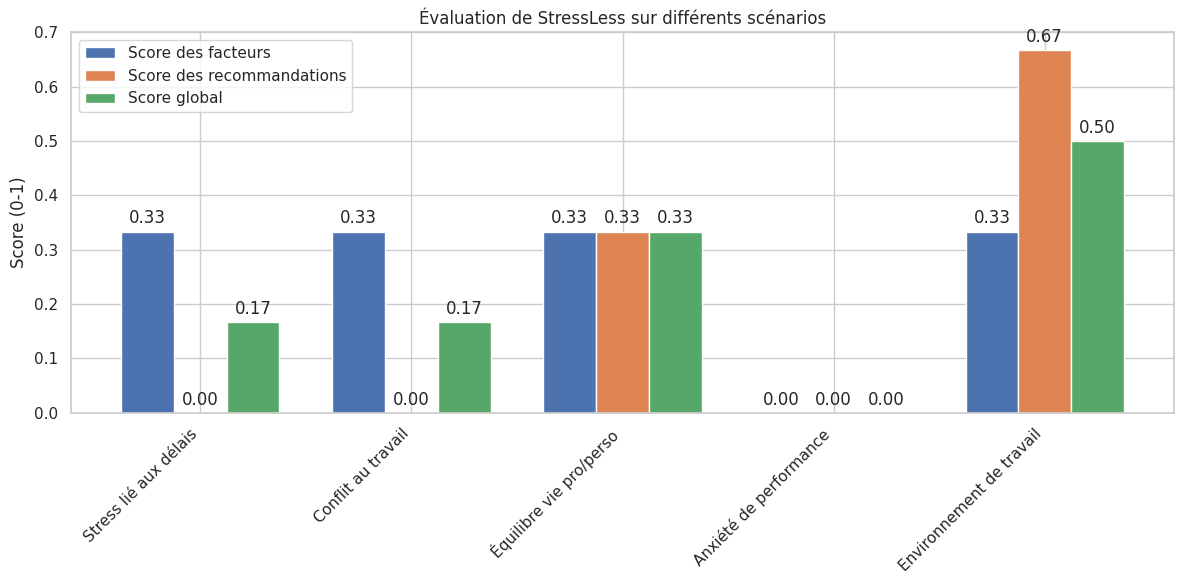

Score moyen des facteurs: 0.27
Score moyen des recommandations: 0.20
Score global moyen: 0.23


In [ ]:
# Évaluation et métriques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scénarios de test pour l'évaluation
test_scenarios = [
    {
        "name": "Stress lié aux délais",
        "query": "Je suis très stressé car j'ai trois projets à rendre cette semaine et je n'arrive pas à tout gérer.",
        "expected_factors": ["délais", "charge de travail", "gestion du temps"],
        "expected_recommendations": ["priorisation", "technique pomodoro", "délégation"]
    },
    {
        "name": "Conflit au travail",
        "query": "Je suis en conflit avec un collègue qui ne respecte pas mon travail et me critique constamment.",
        "expected_factors": ["conflit", "relations", "communication"],
        "expected_recommendations": ["communication assertive", "médiation", "limites"]
    },
    {
        "name": "Équilibre vie pro/perso",
        "query": "Je travaille tellement que je n'ai plus de temps pour ma famille et mes loisirs, je me sens épuisé.",
        "expected_factors": ["équilibre", "surcharge", "épuisement"],
        "expected_recommendations": ["limites", "planification", "repos"]
    },
    {
        "name": "Anxiété de performance",
        "query": "J'ai une présentation importante devant la direction la semaine prochaine et j'ai peur de ne pas être à la hauteur.",
        "expected_factors": ["anxiété", "performance", "peur"],
        "expected_recommendations": ["préparation", "visualisation", "respiration"]
    },
    {
        "name": "Environnement de travail",
        "query": "Mon bureau est très bruyant et je suis constamment interrompu, ce qui me stresse énormément.",
        "expected_factors": ["environnement", "bruit", "interruptions"],
        "expected_recommendations": ["casque", "télétravail", "plages horaires"]
    }
]

# Fonction pour évaluer la pertinence des facteurs identifiés
def evaluate_factors_relevance(analysis, expected_factors):
    if "error" in analysis or "stress_factors" not in analysis:
        return 0

    identified_factors = [factor["factor"].lower() for factor in analysis["stress_factors"]]

    # Calculer le nombre de facteurs attendus qui ont été identifiés
    matches = 0
    for expected in expected_factors:
        if any(expected in factor for factor in identified_factors):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_factors) if expected_factors else 0
    return relevance_score

# Fonction pour évaluer la pertinence des recommandations
def evaluate_recommendations_relevance(analysis, expected_recommendations):
    if "error" in analysis or "recommendations" not in analysis:
        return 0

    identified_recommendations = [rec["recommendation"].lower() for rec in analysis["recommendations"]]

    # Calculer le nombre de recommandations attendues qui ont été fournies
    matches = 0
    for expected in expected_recommendations:
        if any(expected in rec for rec in identified_recommendations):
            matches += 1

    # Calculer le score de pertinence (0-1)
    relevance_score = matches / len(expected_recommendations) if expected_recommendations else 0
    return relevance_score

# Exécuter les tests et collecter les résultats
evaluation_results = []

for scenario in test_scenarios:
    print(f"Évaluation du scénario: {scenario['name']}")

    # Générer l'analyse structurée
    analysis = generate_structured_analysis(scenario["query"])

    # Évaluer la pertinence des facteurs et recommandations
    factors_score = evaluate_factors_relevance(analysis, scenario["expected_factors"])
    recommendations_score = evaluate_recommendations_relevance(analysis, scenario["expected_recommendations"])

    # Calculer un score global
    overall_score = (factors_score + recommendations_score) / 2

    # Collecter les résultats
    evaluation_results.append({
        "scenario": scenario["name"],
        "factors_score": factors_score,
        "recommendations_score": recommendations_score,
        "overall_score": overall_score
    })

    print(f"  Score des facteurs: {factors_score:.2f}")
    print(f"  Score des recommandations: {recommendations_score:.2f}")
    print(f"  Score global: {overall_score:.2f}\n")

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(evaluation_results)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Créer un graphique à barres groupées
x = np.arange(len(results_df))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, results_df["factors_score"], width, label="Score des facteurs")
rects2 = ax.bar(x, results_df["recommendations_score"], width, label="Score des recommandations")
rects3 = ax.bar(x + width, results_df["overall_score"], width, label="Score global")

# Ajouter des étiquettes et une légende
ax.set_ylabel("Score (0-1)")
ax.set_title("Évaluation de StressLess sur différents scénarios")
ax.set_xticks(x)
ax.set_xticklabels(results_df["scenario"], rotation=45, ha="right")
ax.legend()

# Ajouter les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Calculer et afficher les scores moyens
avg_factors_score = results_df["factors_score"].mean()
avg_recommendations_score = results_df["recommendations_score"].mean()
avg_overall_score = results_df["overall_score"].mean()

print(f"Score moyen des facteurs: {avg_factors_score:.2f}")
print(f"Score moyen des recommandations: {avg_recommendations_score:.2f}")
print(f"Score global moyen: {avg_overall_score:.2f}")

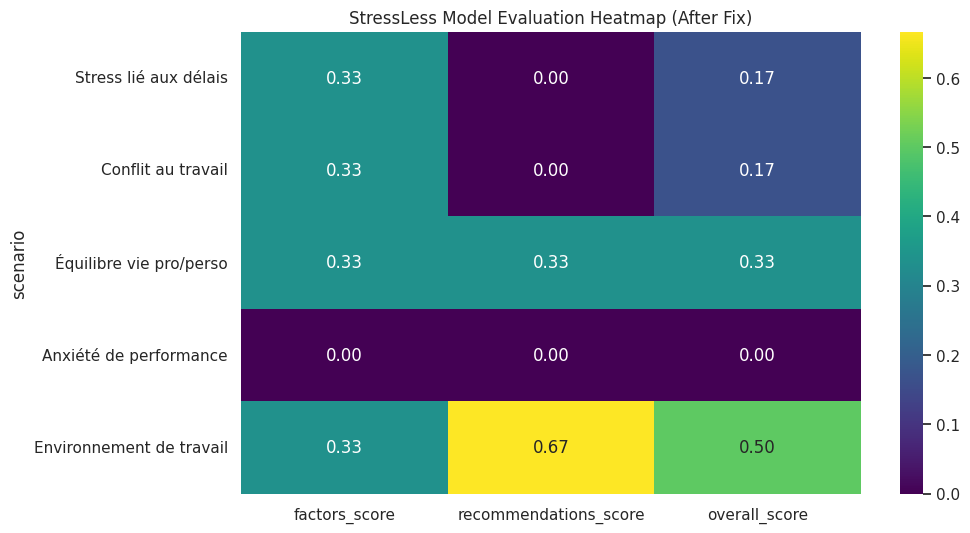

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index('scenario')[['factors_score', 'recommendations_score', 'overall_score']],
            annot=True,
            cmap='viridis',
            fmt=".2f")
plt.title('StressLess Model Evaluation Heatmap (After Fix)')
plt.show()

In [16]:

def visualize_stress_evolution(stress_history_df):
    """
    Visualise l'évolution du niveau de stress au fil du temps.
    Args:
        stress_history_df: DataFrame contenant 'date' et 'stress_level'
    """
    plt.figure(figsize=(12, 6))
    plt.plot(stress_history_df['date'], stress_history_df['stress_level'],
             marker='o', linewidth=2, markersize=6, color='#3498db', label='Niveau de stress')

    # Ajouter une ligne de tendance
    z = np.polyfit(range(len(stress_history_df)), stress_history_df['stress_level'], 2)
    p = np.poly1d(z)
    plt.plot(stress_history_df['date'], p(range(len(stress_history_df))),
             "--", color='#e74c3c', linewidth=2, label='Tendance')

    plt.title('Évolution du niveau de stress au fil du temps', fontsize=14, weight='bold')
    plt.xlabel('Date')
    plt.ylabel('Niveau de stress (0-10)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Utilisation (si vous avez des données temporelles):
# stress_history_df = pd.DataFrame({
#     'date': pd.date_range('2025-01-01', periods=30, freq='D'),
#     'stress_level': np.random.randint(3, 9, 30)
# })
# visualize_stress_evolution(stress_history_df)


In [17]:

def visualize_pareto_stress_factors(analysis):
    """
    Visualise le diagramme de Pareto pour identifier les facteurs critiques.
    Les 20% des facteurs causent 80% du stress.
    Args:
        analysis (dict): Dictionnaire contenant l'analyse structurée du stress
    """
    if "stress_factors" not in analysis or not analysis["stress_factors"]:
        print("Aucun facteur de stress à visualiser")
        return

    # Extraire les données
    factors = [f["factor"] for f in analysis["stress_factors"]]
    severities = [f["severity"] for f in analysis["stress_factors"]]

    # Trier par sévérité décroissante
    sorted_indices = sorted(range(len(severities)), key=lambda i: severities[i], reverse=True)
    factors = [factors[i] for i in sorted_indices]
    severities = [severities[i] for i in sorted_indices]

    # Calculer les cumuls
    cumulative = np.cumsum(severities)
    cumulative_pct = (cumulative / cumulative[-1]) * 100

    # Créer le graphique
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Barres pour les sévérités
    x_pos = np.arange(len(factors))
    bars = ax1.bar(x_pos, severities, color='#3498db', alpha=0.7, label='Sévérité')
    ax1.set_xlabel('Facteurs de stress')
    ax1.set_ylabel('Sévérité (1-10)', color='#3498db')
    ax1.set_title('Diagramme de Pareto - Facteurs de stress prioritaires', fontsize=14, weight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(factors, rotation=45, ha='right')
    ax1.tick_params(axis='y', labelcolor='#3498db')

    # Ligne courbe pour le cumul en pourcentage
    ax2 = ax1.twinx()
    line = ax2.plot(x_pos, cumulative_pct, color='#e74c3c', marker='o',
                    linewidth=2, markersize=8, label='Cumul %')
    ax2.set_ylabel('Cumul en pourcentage (%)', color='#e74c3c')
    ax2.tick_params(axis='y', labelcolor='#e74c3c')
    ax2.set_ylim(0, 110)

    # Ajouter la ligne 80%
    ax2.axhline(y=80, color='#f39c12', linestyle='--', linewidth=2, label='Seuil 80%')

    # Légende combinée
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left')

    # Ajouter des annotations
    for i, (sev, cum_pct) in enumerate(zip(severities, cumulative_pct)):
        ax1.text(i, sev + 0.2, str(int(sev)), ha='center', fontsize=9)
        if i % max(1, len(factors)//5) == 0:  # Afficher tous les 5e points
            ax2.text(i, cum_pct + 2, f'{int(cum_pct)}%', ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Utilisation:
# visualize_pareto_stress_factors(analysis)


In [18]:

def visualize_correlation_matrix(results_df):
    """
    Visualise les corrélations entre les scores et autres variables.
    Args:
        results_df: DataFrame contenant les scores (factors_score, recommendations_score, overall_score)
    """
    if results_df.empty or len(results_df) < 3:
        print("Pas assez de données pour une matrice de corrélation")
        return

    # Sélectionner les colonnes numériques
    numeric_cols = results_df.select_dtypes(include=[np.number]).columns
    corr_matrix = results_df[numeric_cols].corr()

    # Créer la heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matrice de corrélation des scores StressLess', fontsize=12, weight='bold')
    plt.tight_layout()
    plt.show()

# Utilisation:
# visualize_correlation_matrix(results_df)



VISUALISATION: Matrice de corrélation


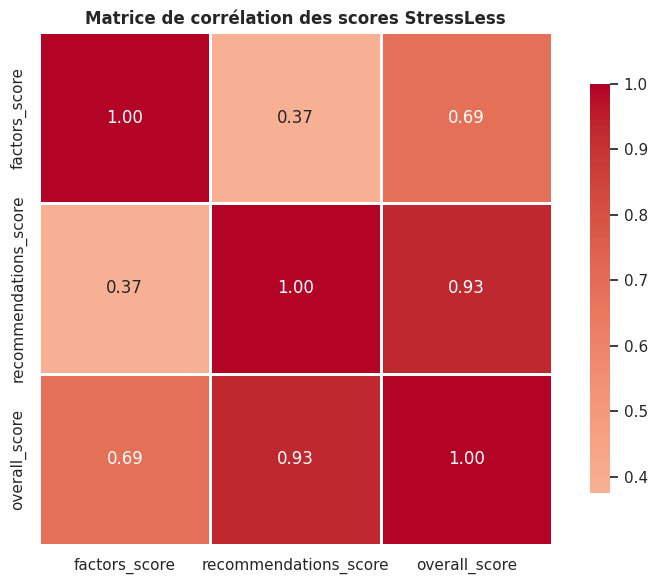


VISUALISATION: Diagramme de Pareto


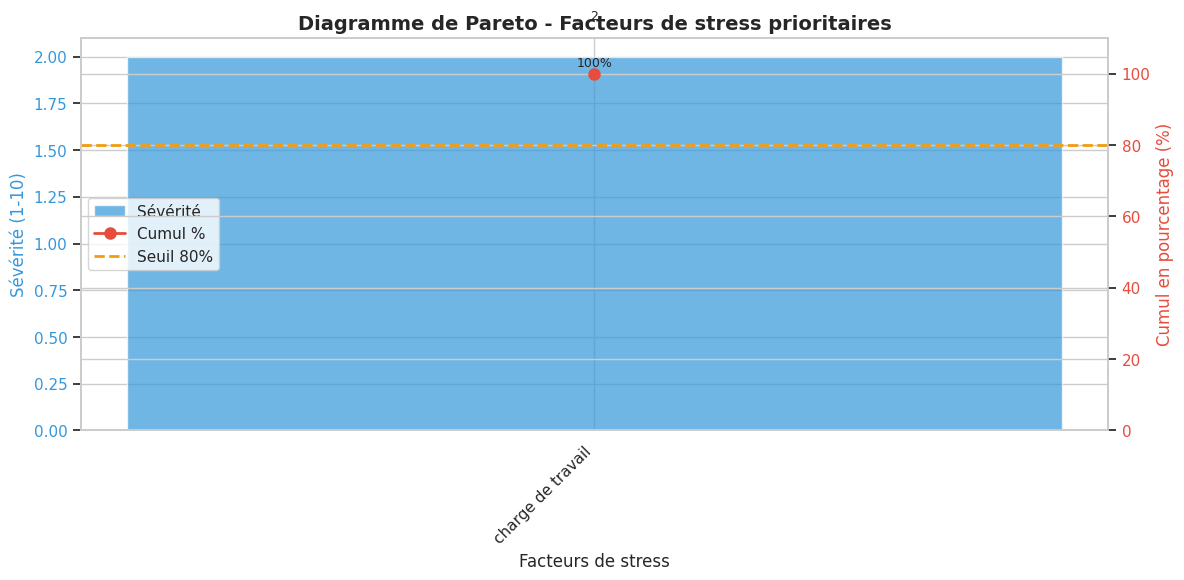


VISUALISATION: Évolution temporelle (Exemple)


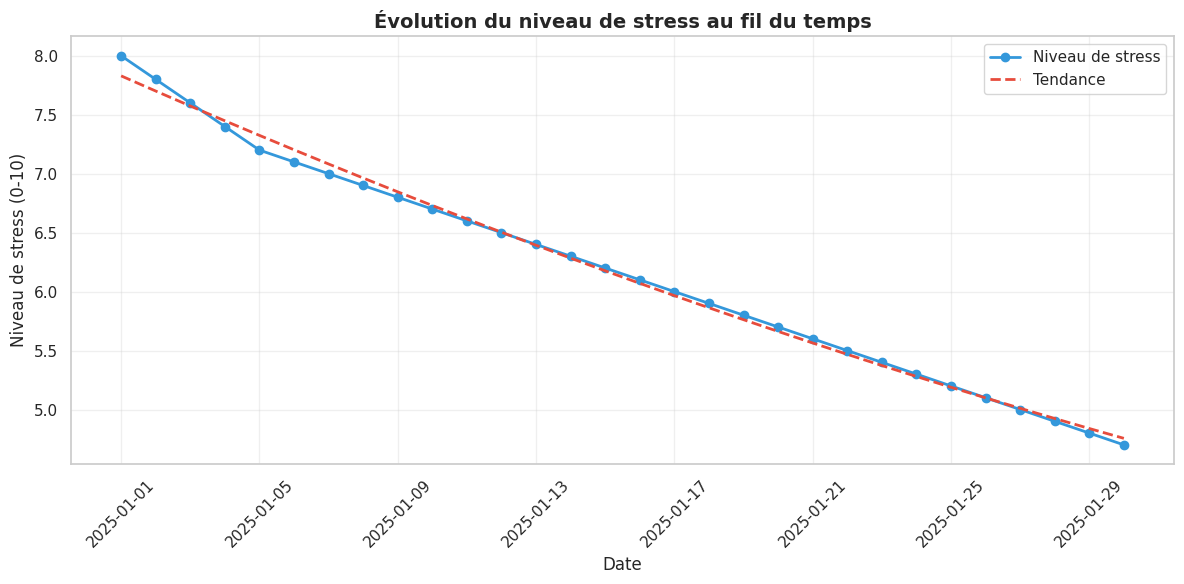


✅ Tous les graphiques supplémentaires ont été générés avec succès!


In [20]:


# 1️⃣ MATRICE DE CORRÉLATION (utilise results_df)
print("\n" + "="*50)
print("VISUALISATION: Matrice de corrélation")
print("="*50)
visualize_correlation_matrix(results_df)


# 2️⃣ DIAGRAMME DE PARETO (utilise analysis d'un cas spécifique)
# Exemple:
print("\n" + "="*50)
print("VISUALISATION: Diagramme de Pareto")
print("="*50)
# Créer une analyse exemple
example_query = "Je suis très stressé car j'ai trois projets à rendre cette semaine"
analysis_example = generate_structured_analysis(example_query)

# Afficher le diagramme Pareto
visualize_pareto_stress_factors(analysis_example)


# 3️⃣ GRAPHIQUE D'ÉVOLUTION TEMPORELLE
print("\n" + "="*50)
print("VISUALISATION: Évolution temporelle (Exemple)")
print("="*50)
# Créer des données d'exemple
stress_history_example = pd.DataFrame({
    'date': pd.date_range('2025-01-01', periods=30, freq='D'),
    'stress_level': np.array([8, 7.8, 7.6, 7.4, 7.2, 7.1, 7.0, 6.9, 6.8, 6.7,
                              6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6.0, 5.9, 5.8, 5.7,
                              5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5.0, 4.9, 4.8, 4.7])
})

# Afficher le graphique d'évolution
visualize_stress_evolution(stress_history_example)

print("\n✅ Tous les graphiques supplémentaires ont été générés avec succès!")
